FASE 1 : Comprensión del negocio 

World of warcraft es un MMORPG en el cual los jugadores pueden caracterizarse por razas y a la vez por clases. Puede personalizar su personaje para pelear contra otros jugadores o para realizar misiones del juego y subir de nivel de personaje o de honor con las distintas zonas. Cada una de estas zonas están diseñadas para conllevar distintos tipos de jugadores, desde los más novatos hasta los más avanzados en el juego. Este juego tiene muchos factores con los cuales se pueden generar diferentes análisis, ya sea, sobre la popularidad de las zonas, la media de jugadores por nivel, control de las zonas a lo largo del tiempo, cómo han cambiado las preferencias de zonas y actividades de los jugadores con diferentes versiones del juego, etc. 

Ahora, nuestro equipo, con el DataSet entregado decidió hacer un análisis exhaustivo el cual se centre en el ámbito de las zonas, más específicamente, el equipo responderá la interrogante de : ¿Existen zonas donde el nivel de los jugadores es más homogéneo en comparación con otras zonas?, ¿Qué tipo de zonas (por ejemplo, mazmorras, ciudades, áreas PvP) son más populares?, ¿Hay zonas altamente disputadas entre facciones y cómo afecta esto al comportamiento de los jugadores?, ¿Los jugadores de niveles más bajos evitan zonas controladas por facciones opuestas o de nivel alto? . Descubrir si hay zonas con una población de niveles más homogénea nos puede dar pistas sobre las preferencias de los jugadores y cómo eligen moverse por el mundo del juego. Esto puede estar influenciado por el diseño de las zonas, el tipo de contenido disponible y las recompensas que se pueden obtener. En esta primera fase de nuestro análisis CRISP-DM, vamos a sumergirnos en los datos para detectar cómo se distribuyen los niveles de los jugadores en diferentes zonas. Este análisis nos ayudará a encontrar patrones y a entender cómo la uniformidad de niveles varía de una zona a otra, lo cual puede ser crucial para futuras decisiones de diseño y ajuste dentro del juego.

En este trabajo nos basaremos en el modelo analitico de CRISP-DM para nuestro proceso de Machine Learning. Este modelo tiene como ventaja que es flexible, facil de comprender y adaptable a la gran mayoria de proyectos. CRISP-DM tiene como formación una cantidad de 6 fases, estas son: 
**1) Comprensión del negocio:**  Definir claramente el contexto y los objetivos del negocio.
**2) Comprensión de los datos:** Explorar, describir y analizar los datos de los DataSets para identificar problemas de calidad o patrones importantes.
**3) Preparación de los datos:** Limpiar, transformar y seleccionar los datos relevantes para el análisis.
**4) Modelado:** Aplicar algoritmos y técnicas de minería de datos (como árboles de decisión, regresión, etc.) para construir modelos que resuelvan el problema de negocio.
**5) Evaluación:** Verificar si los modelos creados son útiles y cumplen con los objetivos del negocio, ajustando si es necesario.
**6) Despliegue:** Implementar el modelo en un entorno real, ya sea para automatizar decisiones, generar informes o cualquier otra aplicación del negocio requerido.

FASE 2 : Comprensión de los datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from scipy import stats
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error

In [3]:
zones = pd.read_csv('../data/01_raw/zones.csv')
wowah_data = pd.read_csv('../data/01_raw/wowah_data.csv')
locations = pd.read_csv('../data/01_raw/locations.csv')
wowah_data2 = pd.read_csv('../data/01_raw/wowah_data.csv')


Debido a problemas con la escrituras del dataframe fuente de wowah_data vamos a ejecutar una linea con la cuál eliminas los espacios.

In [4]:
wowah_data.columns = wowah_data.columns.str.strip()
wowah_data2.columns = wowah_data2.columns.str.strip()

Para comenzar con el análisis exploratorio, es esencial identificar y comprender la información contenida en cada uno de los datasets que vamos a utilizar. A continuación, se presenta un resumen de los tres principales datasets involucrados en nuestro estudio.

In [213]:
zones.head(8)

,Zone_Name,Continent,Area,Zone,Subzone,Type,Size,Controlled,Min_req_level,Min_rec_level,Max_rec_level,Min_bot_level,Max_bot_level
0,Durotar,Kalimdor,Central Kalimdor,Durotar,NaN,Zone,NaN,Horde,1,1.0,10.0,1.0,10.0
1,The Barrens,Kalimdor,Central Kalimdor,The Barrens,NaN,Zone,NaN,Contested,1,10.0,35.0,10.0,35.0
2,Silverpine Forest,Eastern Kingdoms,Lordaeron,Silverpine Forest,NaN,Zone,NaN,Horde,1,10.0,20.0,10.0,20.0
3,Stonetalon Mountains,Kalimdor,Central Kalimdor,Stonetalon Mountains,NaN,Zone,NaN,Contested,1,25.0,30.0,25.0,30.0
4,Thunder Bluff,Kalimdor,Central Kalimdor,Thunder Bluff,NaN,City,NaN,Horde,1,1.0,100.0,1.0,100.0
5,Dustwallow Marsh,Kalimdor,Central Kalimdor,Dustwallow Marsh,NaN,Zone,NaN,Contested,1,35.0,40.0,35.0,40.0
6,Orgrimmar,Kalimdor,Central Kalimdor,Durotar,Orgrimmar,City,NaN,Horde,1,1.0,100.0,1.0,100.0
7,Undercity,Eastern Kingdoms,Lordaeron,Tirisfal Glades,Undercity,City,NaN,Horde,1,1.0,100.0,1.0,100.0


In [214]:
wowah_data.head(8)

,char,level,race,charclass,zone,guild,timestamp
0,59425,1,Orc,Rogue,Orgrimmar,165,01/01/08 00:02:04
1,65494,9,Orc,Hunter,Durotar,-1,01/01/08 00:02:04
2,65325,14,Orc,Warrior,Ghostlands,-1,01/01/08 00:02:04
3,65490,18,Orc,Hunter,Ghostlands,-1,01/01/08 00:02:04
4,2288,60,Orc,Hunter,Hellfire Peninsula,-1,01/01/08 00:02:09
5,2289,60,Orc,Hunter,Hellfire Peninsula,-1,01/01/08 00:02:09
6,61239,68,Orc,Hunter,Blade's Edge Mountains,243,01/01/08 00:02:14
7,59772,69,Orc,Warrior,Shadowmoon Valley,35,01/01/08 00:02:14


In [215]:
locations.head(8)

,Map_ID,Location_Type,Location_Name,Game_Version
0,0,Continent,Eastern Kingdoms,WoW
1,1,Continent,Kalimdor,WoW
2,530,Continent,Outlands,TBC
3,571,Continent,Northrend,WLK
4,646,Continent,Deepholm,CAT
5,732,Continent,Tol Barad,CAT
6,870,Continent,Pandaria,MoP
7,1064,Continent,Mogu Island Daily Area (Isle of Thunder),MoP


Al analizar estos tres datasets, buscamos identificar patrones en la distribución de los niveles de los jugadores a través de diferentes zonas, entender cómo las características de las zonas afectan esta distribución y explorar cómo los mapas y sus versiones juegan un papel en la experiencia del juego. Este enfoque nos permitirá obtener una visión integral de cómo los jugadores interactúan con el mundo de World of Warcraft y cómo se pueden ajustar las zonas y los mapas para mejorar el juego.

Vamos a describir los datos para proporcionar un análisis detallado que va más allá de los estadísticos básicos obtenidos con la función describe(). Esto no solo presenta las medidas de tendencia central y dispersión, sino que también ayuda a interpretar cómo estos valores se relacionan con el negocio. Al hacerlo, se pueden identificar patrones y tendencias que son esenciales para la toma de decisiones informadas, mejorar estrategias de juego y optimizar la experiencia del usuario. Esta comprensión más profunda de los datos es crucial para un análisis efectivo y para obtener información valiosa que respalde el desarrollo.

es útil saber qué tipo de datos tenemos en cada uno de los datasets. Esto nos ayuda a entender cómo podemos trabajar con la información. A continuacion mostraremos los diferente tipos de datos de cada uno de los datasets:

In [216]:
zones.describe()

,Size,Min_req_level,Min_rec_level,Max_rec_level,Min_bot_level,Max_bot_level
count,68.000000,160.000000,159.000000,159.000000,158.000000,158.000000
mean,11.544118,22.975000,39.981132,61.918239,40.518987,61.974684
std,10.935952,29.272511,28.165980,27.350276,28.128622,26.861036
min,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,1.000000,10.000000,42.000000,10.000000,40.750000
50%,5.000000,1.000000,45.000000,70.000000,46.000000,70.000000
75%,16.250000,57.250000,67.000000,80.000000,68.000000,80.000000
max,40.000000,80.000000,80.000000,100.000000,80.000000,100.000000


In [217]:
zones.dtypes
description = zones.describe()
for column in description.columns:
    print(f"Análisis de {column}:")
    
    mean_value = description.loc['mean', column]
    print(f" - Media (Promedio): {mean_value:.2f} ")
    
    median_value = zones[column].median()
    print(f" - Mediana: {median_value:.2f} ")
    
    q1 = description.loc['25%', column]
    q3 = description.loc['75%', column]
    iqr = q3 - q1
    print(f" - IQR (Rango Intercuartílico): {iqr:.2f} ")
    
    std_dev = description.loc['std', column]
    print(f" - Desviación estándar: {std_dev:.2f} ")
    
    min_value = description.loc['min', column]
    max_value = description.loc['max', column]
    print(f" - Mínimo: {min_value:.2f}, Máximo: {max_value:.2f} ")


Análisis de Size:
 - Media (Promedio): 11.54 
 - Mediana: 5.00 
 - IQR (Rango Intercuartílico): 11.25 
 - Desviación estándar: 10.94 
 - Mínimo: 5.00, Máximo: 40.00 
Análisis de Min_req_level:
 - Media (Promedio): 22.98 
 - Mediana: 1.00 
 - IQR (Rango Intercuartílico): 56.25 
 - Desviación estándar: 29.27 
 - Mínimo: 1.00, Máximo: 80.00 
Análisis de Min_rec_level:
 - Media (Promedio): 39.98 
 - Mediana: 45.00 
 - IQR (Rango Intercuartílico): 57.00 
 - Desviación estándar: 28.17 
 - Mínimo: 0.00, Máximo: 80.00 
Análisis de Max_rec_level:
 - Media (Promedio): 61.92 
 - Mediana: 70.00 
 - IQR (Rango Intercuartílico): 38.00 
 - Desviación estándar: 27.35 
 - Mínimo: 0.00, Máximo: 100.00 
Análisis de Min_bot_level:
 - Media (Promedio): 40.52 
 - Mediana: 46.00 
 - IQR (Rango Intercuartílico): 58.00 
 - Desviación estándar: 28.13 
 - Mínimo: 1.00, Máximo: 80.00 
Análisis de Max_bot_level:
 - Media (Promedio): 61.97 
 - Mediana: 70.00 
 - IQR (Rango Intercuartílico): 39.25 
 - Desviación est

La mayoría de las zonas tienen tamaños pequeños, con un promedio de 11.54 y una mediana de 5.0. Hay una amplia variación en el tamaño (máximo 40). En cuanto a los niveles, el nivel mínimo requerido promedio es 22.98, pero la mayoría de las zonas tienen un nivel mínimo de 1, lo que indica que muchas están accesibles desde el inicio. El nivel recomendado mínimo promedio es 39.98, y el máximo es 61.92, lo que sugiere que las zonas están diseñadas para jugadores de nivel medio-alto. En cuanto a los bots, el nivel mínimo promedio es 40.52, con un máximo de 61.97, lo que indica que los bots son, en su mayoría, de niveles similares a los recomendados para jugadores.

In [ ]:
wowah_data.describe()

In [219]:
description_wowah = wowah_data.describe()

for column in description_wowah.columns:
    print(f"Análisis de {column} en wowah_data:")
    
    mean_value = description_wowah.loc['mean', column]
    print(f" - Media (Promedio): {mean_value:.2f} ")
    
    median_value = wowah_data[column].median()
    print(f" - Mediana: {median_value:.2f} ")
    
    q1 = description_wowah.loc['25%', column]
    q3 = description_wowah.loc['75%', column]
    iqr = q3 - q1
    print(f" - IQR (Rango Intercuartílico): {iqr:.2f} ")
    
    std_dev = description_wowah.loc['std', column]
    print(f" - Desviación estándar: {std_dev:.2f} ")
    
    min_value = description_wowah.loc['min', column]
    max_value = description_wowah.loc['max', column]
    print(f" - Mínimo: {min_value:.2f}, Máximo: {max_value:.2f} ")



Análisis de char en wowah_data:
 - Media (Promedio): 37221.80 
 - Mediana: 36106.00 
 - IQR (Rango Intercuartílico): 37409.00 
 - Desviación estándar: 21726.58 
 - Mínimo: 7.00, Máximo: 67043.00 
Análisis de level en wowah_data:
 - Media (Promedio): 60.56 
 - Mediana: 70.00 
 - IQR (Rango Intercuartílico): 9.00 
 - Desviación estándar: 17.85 
 - Mínimo: 1.00, Máximo: 70.00 
Análisis de guild en wowah_data:
 - Media (Promedio): 121.88 
 - Mediana: 103.00 
 - IQR (Rango Intercuartílico): 169.00 
 - Desviación estándar: 94.60 
 - Mínimo: -1.00, Máximo: 316.00 


La mayoría de los personajes tienen niveles altos, con una media de 60.56 y una mediana de 70, lo que indica que muchos están cerca del nivel máximo del juego (70). Los datos de guild muestran una media de 121.88, aunque la variación es considerable, con un rango de -1 a 316, lo que podría implicar personajes sin gremio o pertenecientes a gremios grandes. En cuanto a los bots, el nivel mínimo requerido es bajo (promedio 40.52), pero muchos llegan hasta niveles más altos, cercanos a los recomendados para jugadores.

In [220]:
locations.describe()

,Map_ID
count,151.000000
mean,696.655629
std,337.953982
min,0.000000
25%,546.500000
50%,618.000000
75%,967.500000
max,1464.000000


In [221]:
description_locations = locations.describe()

for column in description_locations.columns:
    print(f"Análisis de {column} en locations:")
    
    mean_value = description_locations.loc['mean', column]
    print(f" - Media (Promedio): {mean_value:.2f} ")
    
    median_value = locations[column].median()
    print(f" - Mediana: {median_value:.2f} ")

    q1 = description_locations.loc['25%', column]
    q3 = description_locations.loc['75%', column]
    iqr = q3 - q1
    print(f" - IQR (Rango Intercuartílico): {iqr:.2f} ")
    
    std_dev = description_locations.loc['std', column]
    print(f" - Desviación estándar: {std_dev:.2f} ")
    
    min_value = description_locations.loc['min', column]
    max_value = description_locations.loc['max', column]
    print(f" - Mínimo: {min_value:.2f}, Máximo: {max_value:.2f} ")
   

Análisis de Map_ID en locations:
 - Media (Promedio): 696.66 
 - Mediana: 618.00 
 - IQR (Rango Intercuartílico): 421.00 
 - Desviación estándar: 337.95 
 - Mínimo: 0.00, Máximo: 1464.00 


La mayoría de las zonas tienen tamaños pequeños, con un promedio de 11.54 y una mediana de 5.0. El nivel mínimo requerido es bajo, con una media de 22.98, lo que indica accesibilidad desde el inicio del juego. El nivel recomendado mínimo es 39.98, con un máximo de 61.92, sugiriendo que están diseñadas para jugadores de nivel medio-alto. En cuanto a los bots, el nivel mínimo promedio es 40.52, lo que indica que operan en un rango similar a los niveles recomendados para los jugadores. Además, el Map_ID muestra una media de 696.66, con una considerable variación (máximo 1464), lo que sugiere una diversidad en los mapas disponibles.

Para entender mejor los datos numéricos en nuestro dataset zones, usamos .describe(). Este comando nos da un vistazo rápido a cómo se distribuyen los números en las columnas del dataset:

In [222]:
zones.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,68.0,11.544118,10.935952,5.0,5.00,5.0,16.25,40.0
Min_req_level,160.0,22.975000,29.272511,1.0,1.00,1.0,57.25,80.0
Min_rec_level,159.0,39.981132,28.165980,0.0,10.00,45.0,67.00,80.0
Max_rec_level,159.0,61.918239,27.350276,0.0,42.00,70.0,80.00,100.0
Min_bot_level,158.0,40.518987,28.128622,1.0,10.00,46.0,68.00,80.0
Max_bot_level,158.0,61.974684,26.861036,0.0,40.75,70.0,80.00,100.0


In [223]:
zones.isna().sum()


Zone_Name          0
Continent          0
Area               3
Zone               7
Subzone          108
Type               0
Size              92
Controlled         0
Min_req_level      0
Min_rec_level      1
Max_rec_level      1
Min_bot_level      2
Max_bot_level      2
dtype: int64

Al ver siguiente analisis de datos nos damos que hay columnas con datos faltantes.

In [224]:
filas, columnas = zones.shape
filas , columnas 

(160, 13)

A continuación, exploraremos cuáles son las clases más jugadas en World of Warcraft. Identificar las clases más populares nos ayudará a comprender mejor las preferencias de los jugadores y cómo se distribuyen entre las diferentes opciones disponibles en el juego.

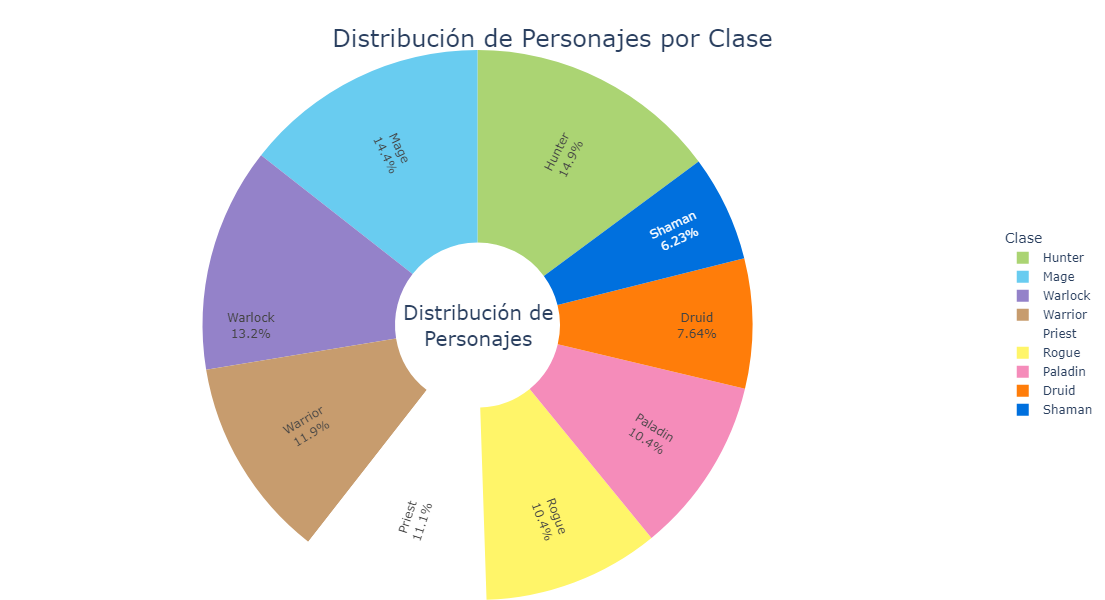

In [225]:
class_counts = wowah_data['charclass'].value_counts()


colors = {
    'Druid': '#FF7D0A',   # Naranja
    'Hunter': '#ABD473',  # Verde
    'Mage': '#69CCF0',    # Azul claro
    'Paladin': '#F58CBA', # Rosa
    'Priest': '#FFFFFF',  # Blanco
    'Rogue': '#FFF569',   # Amarillo
    'Shaman': '#0070DE',  # Azul
    'Warlock': '#9482C9', # Morado
    'Warrior': '#C79C6E'  # Marrón claro
}

fig = go.Figure(data=[go.Pie(
    labels=class_counts.index,
    values=class_counts,
    marker=dict(
        colors=[colors.get(clase, '#000000') for clase in class_counts.index]
    ),
    textinfo='label+percent',
    insidetextorientation='radial',
    hole=0.3 
)])

fig.update_layout(
    title_text='Distribución de Personajes por Clase',
    title_font_size=24,
    title_x=0.5,
    title_y=0.95,
    legend_title_text='Clase',
    legend=dict(
        x=1.05,  
        y=0.5,
        traceorder='normal',
        orientation='v'
    ),
    margin=dict(l=0, r=150, t=50, b=0),  
    width=800,  
    height=600,  
    annotations=[dict(
        text='Distribución de<br>Personajes',
        x=0.5,
        y=0.5,
        font_size=20,
        showarrow=False
    )]
)

fig.show()

Este análisis identifica las clases más jugadas en World of Warcraft mediante el conteo de personajes por clase. Utilizamos la función `value_counts()` para obtener la distribución de clases y asignamos colores específicos a cada una para mejorar la visualización. Luego, se crea un gráfico de pie con Plotly, que permite ver claramente las proporciones de cada clase. Este análisis nos ayuda a comprender las preferencias de los jugadores y la distribución de personajes en el juego.

In [226]:
class_counts = wowah_data['charclass'].value_counts()
class_counts


charclass
Hunter     155891
Mage       151202
Warlock    138181
Warrior    124262
Priest     116138
Rogue      108818
Paladin    108734
Druid       80061
Shaman      65288
Name: count, dtype: int64

Ya que el enfoque principal de nuestro analisis se basa nada mas en las dos primeras versiones del juego debido a la imnensa cantidad de datos nos gustaria dividir los numeros de jugadores totales asi que filtraremos solamente a la poblacion que jugo esas versiones de juego.

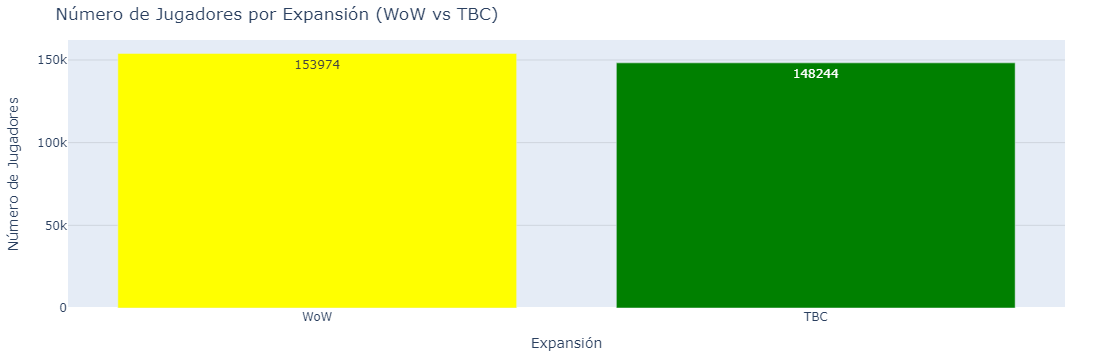

In [227]:
filtered_locations_wow = locations[locations['Game_Version'] == 'WoW']
filtered_locations_tbc = locations[locations['Game_Version'] == 'TBC']

filtered_wowah_data_wow = wowah_data[wowah_data['zone'].isin(filtered_locations_wow['Location_Name'])]
filtered_wowah_data_tbc = wowah_data[wowah_data['zone'].isin(filtered_locations_tbc['Location_Name'])]

merged_filtered_data_wow = pd.merge(filtered_wowah_data_wow, filtered_locations_wow, left_on='zone', right_on='Location_Name', how='left')
merged_filtered_data_tbc = pd.merge(filtered_wowah_data_tbc, filtered_locations_tbc, left_on='zone', right_on='Location_Name', how='left')

expansion_counts = {
    'WoW': len(merged_filtered_data_wow),
    'TBC': len(merged_filtered_data_tbc)
}

fig = go.Figure(data=[go.Bar(
    x=list(expansion_counts.keys()),
    y=list(expansion_counts.values()),
    marker_color=['yellow', 'green'],  
    text=[f'{count}' for count in expansion_counts.values()],
    textposition='auto'
)])

fig.update_layout(
    title='Número de Jugadores por Expansión (WoW vs TBC)',
    xaxis_title='Expansión',
    yaxis_title='Número de Jugadores',
    xaxis=dict(tickvals=[0, 1], ticktext=['WoW', 'TBC']),
    yaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.1)', gridwidth=1),
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()

Filtramos los datos de ubicaciones según las versiones del juego: World of Warcraft (WoW) y The Burning Crusade (TBC). Luego, utilizamos estos filtros para crear dos conjuntos de datos: uno para las zonas de WoW y otro para TBC, manteniendo solo las zonas relevantes para cada expansión.
A continuación, realizamos un *merge* entre los datos de personajes y las ubicaciones filtradas para obtener información sobre el número de jugadores por expansión. Finalmente, se genera un gráfico de barras que muestra la cantidad de jugadores en cada expansión, facilitando la comparación visual entre WoW y TBC. Este análisis nos permite evaluar la distribución de la base de jugadores a través de las diferentes expansiones del juego.

Para la exploracion de datos nos gustaria igualmente analizar el numero de jugadores por zona para asi tener una idea de como va a ser nuestra hipotesis principalmente.

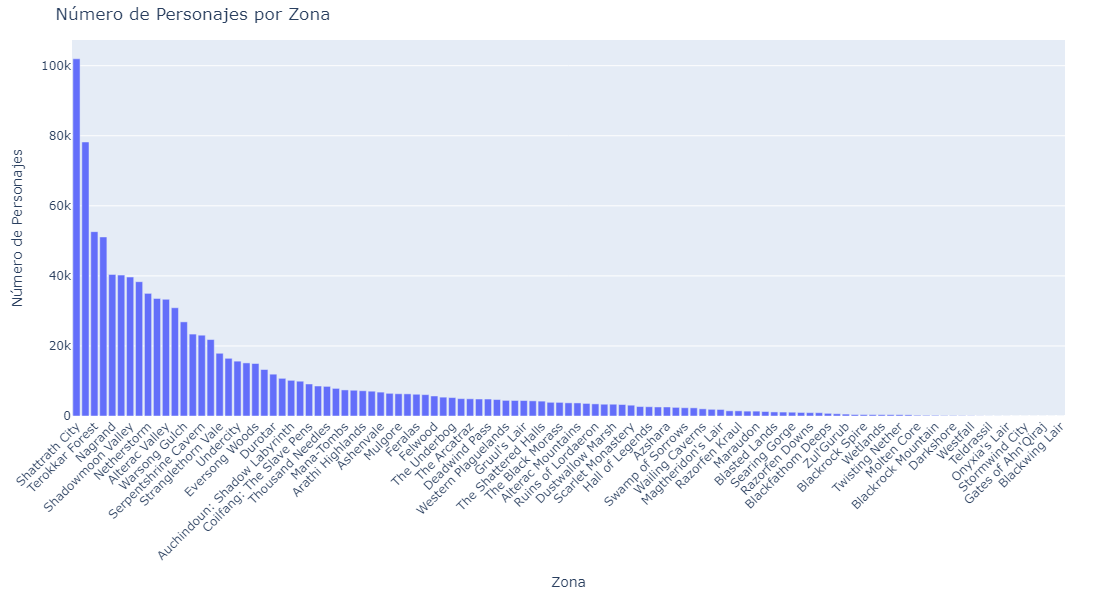

In [228]:
zone_counts = wowah_data['zone'].value_counts().reset_index()
zone_counts.columns = ['zone', 'count']

fig = px.bar(
    zone_counts,
    x='zone',
    y='count',
    title='Número de Personajes por Zona',
    labels={'zone': 'Zona', 'count': 'Número de Personajes'},
    height=600,
    width=1000
)

fig.update_layout(
    xaxis_title='Zona',
    yaxis_title='Número de Personajes',
    xaxis=dict(tickangle=-45), 
    margin=dict(l=40, r=40, t=40, b=100)  
)

fig.show()

Contamos el número de personajes en cada zona utilizando la función `value_counts()` de pandas, que nos proporciona una tabla con el conteo de personajes por zona. A continuación, se crea un gráfico de barras para visualizar la distribución de personajes en cada zona del juego.

este gráfico proporciona una visión general útil para entender cómo se distribuyen los jugadores en diferentes zonas y puede servir como base para explorar más a fondo las razones detrás de estas tendencias.

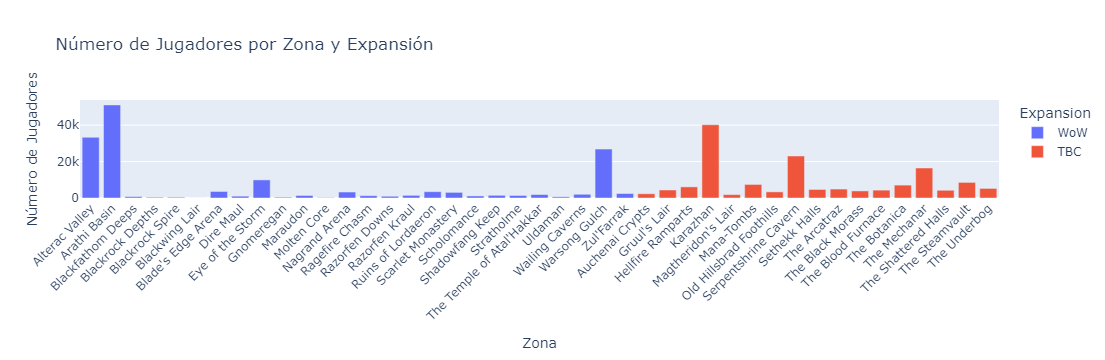

In [229]:

filtered_wowah_data_wow = wowah_data[wowah_data['zone'].isin(locations[locations['Game_Version'] == 'WoW']['Location_Name'])]
filtered_wowah_data_tbc = wowah_data[wowah_data['zone'].isin(locations[locations['Game_Version'] == 'TBC']['Location_Name'])]


expansion_zone_counts = pd.concat([
    filtered_wowah_data_wow.assign(Expansion='WoW'),
    filtered_wowah_data_tbc.assign(Expansion='TBC')
])

zone_expansion_counts = expansion_zone_counts.groupby(['zone', 'Expansion']).size().reset_index(name='count')

fig = px.bar(zone_expansion_counts, x='zone', y='count', color='Expansion',
             title='Número de Jugadores por Zona y Expansión',
             labels={'zone': 'Zona', 'count': 'Número de Jugadores'})
fig.update_layout(xaxis_title='Zona', yaxis_title='Número de Jugadores', xaxis_tickangle=-45)
fig.show()

Filtramos los datos de personajes en función de las expansiones "WoW" y "TBC", utilizando la función `isin()` para seleccionar solo las zonas correspondientes a cada expansión. Luego, concatenamos los datos filtrados y contamos el número de jugadores por zona y expansión mediante la función `groupby()`.

El gráfico de barras que presentamos muestra la distribución del número de jugadores en las distintas zonas, diferenciadas por expansión. Este análisis nos permite comparar la popularidad de las zonas entre WoW y TBC, proporcionando información sobre cómo la población de jugadores varía en función de la expansión y ayudando a entender las preferencias de los jugadores en diferentes versiones del juego.

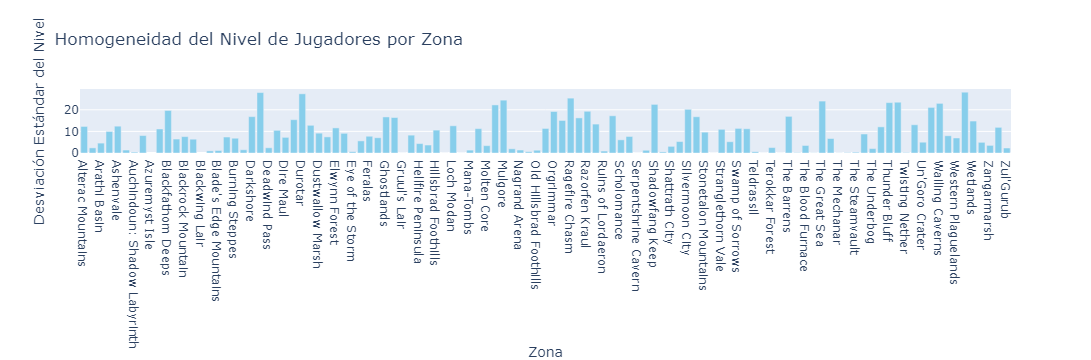

In [230]:
std_dev_by_zone = wowah_data.groupby('zone')['level'].std().reset_index()

fig = go.Figure(data=[go.Bar(x=std_dev_by_zone['zone'], y=std_dev_by_zone['level'], 
                             marker_color='skyblue')])
fig.update_layout(
    title='Homogeneidad del Nivel de Jugadores por Zona',
    xaxis_title='Zona',
    yaxis_title='Desviación Estándar del Nivel'
)
fig.show()

Calculamos la desviación estándar del nivel de los jugadores en cada zona utilizando la función `groupby()` de pandas. Esta medida nos permite evaluar la variabilidad del nivel de los personajes dentro de cada área.

El gráfico de barras que presentamos muestra la desviación estándar de los niveles de los jugadores en cada zona. Este análisis nos permite ver cuán homogéneos o variados son los niveles de los jugadores en diferentes zonas. Las zonas con una baja desviación estándar tienen niveles más uniformes, mientras que aquellas con una alta desviación estándar muestran una mayor diversidad de niveles. Esto nos ayuda a entender mejor la distribución de los niveles en el juego y cómo varía la experiencia de los jugadores según la zona.

A continuacion utilizaremos una matriz de correlación para explorar la relación entre el nivel de los personajes y las características de las zonas en World of Warcraft. Al combinar datos sobre el nivel de los jugadores y las propiedades de las zonas, como los niveles mínimo requerido, recomendado y máximo, así como los niveles de los bots, podemos identificar patrones que influyen en la jugabilidad.
La integración de la matriz de correlación es fundamental para tomar decisiones informadas sobre el equilibrio del juego y la accesibilidad de las zonas, asegurando que se alineen con las expectativas y comportamientos de los jugadores.

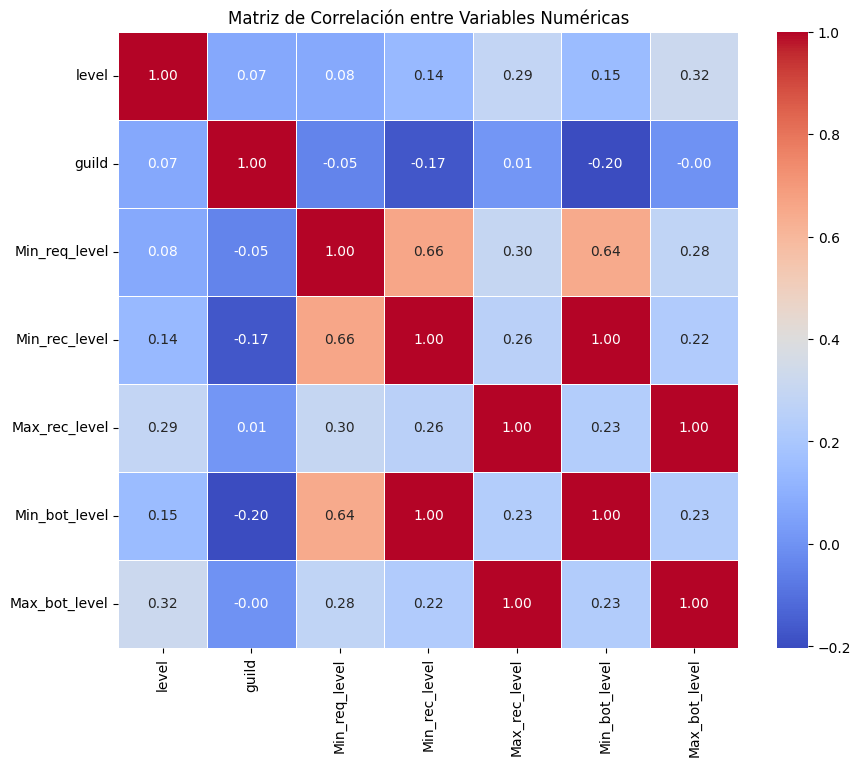

In [231]:
data_combined = pd.concat([wowah_data[['level', 'guild']], 
                           zones[['Min_req_level', 'Min_rec_level', 'Max_rec_level', 'Min_bot_level', 'Max_bot_level']]], 
                          axis=1)

correlation_matrix = data_combined.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

Al observar la matriz de correlación, podemos identificar relaciones clave entre variables numéricas importantes, como los niveles de los jugadores y las zonas en las que se encuentran. Por ejemplo, una correlación moderada entre el nivel de los personajes y el nivel máximo recomendado de la zona podría indicar que los jugadores tienden a seguir las recomendaciones del juego en cuanto a dónde deberían estar. Por otro lado, correlaciones más bajas en otras áreas podrían sugerir que algunos jugadores se aventuran en zonas fuera de su nivel recomendado, lo que refleja una mayor flexibilidad en el estilo de juego y exploración del mundo.

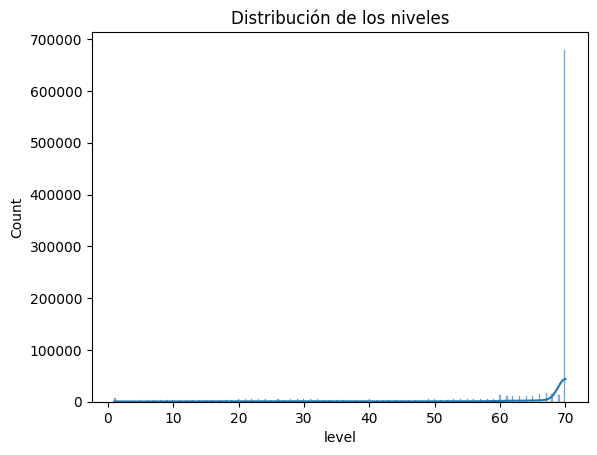

In [232]:
sns.histplot(wowah_data['level'], kde=True)
plt.title('Distribución de los niveles')
plt.show()

En este gráfico, utilizamos un histograma combinado con una estimación de densidad (KDE) para visualizar la distribución de los niveles de los personajes en World of Warcraft. El histograma nos proporciona una representación clara de la frecuencia de cada nivel, mientras que la curva de KDE suaviza la distribución, ayudando a identificar patrones y tendencias en los datos.

FASE 3 : Preparación de los datos

Ahora procederemos a configurar y perfeccionar los DataSet para nuestra conveniencia y así llegar a la solución con datos limpios y significativos.

In [5]:
wowah_data['timestamp'] = pd.to_datetime(wowah_data['timestamp'], format='%m/%d/%y %H:%M:%S')

wowah_data['timestamp'] = wowah_data['timestamp'].astype('int64') // 10**9

wowah_data['timestamp'].head()


0    1199145724
1    1199145724
2    1199145724
3    1199145724
4    1199145729
Name: timestamp, dtype: int64

Cambiamos el tipo de dato de TIMESTAMP de wowah_data para trabajar con numeros y no con tipos de datos de fecha

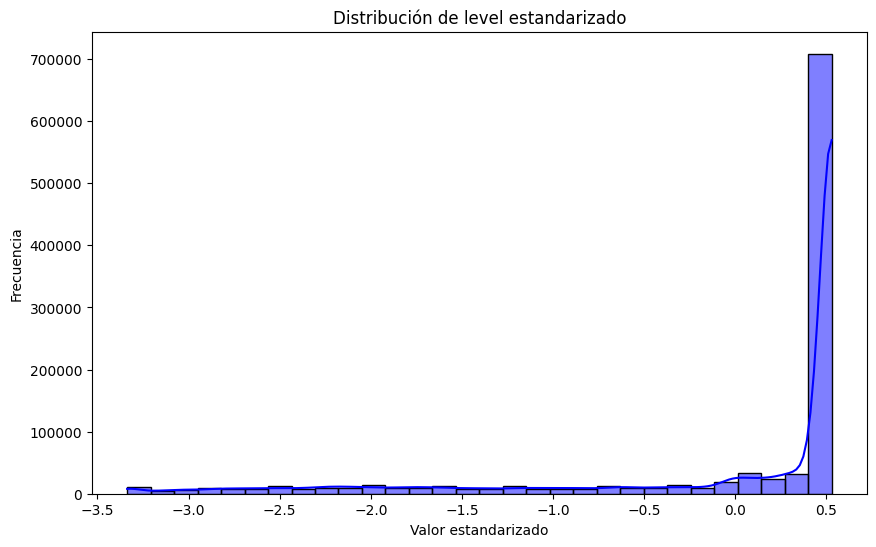

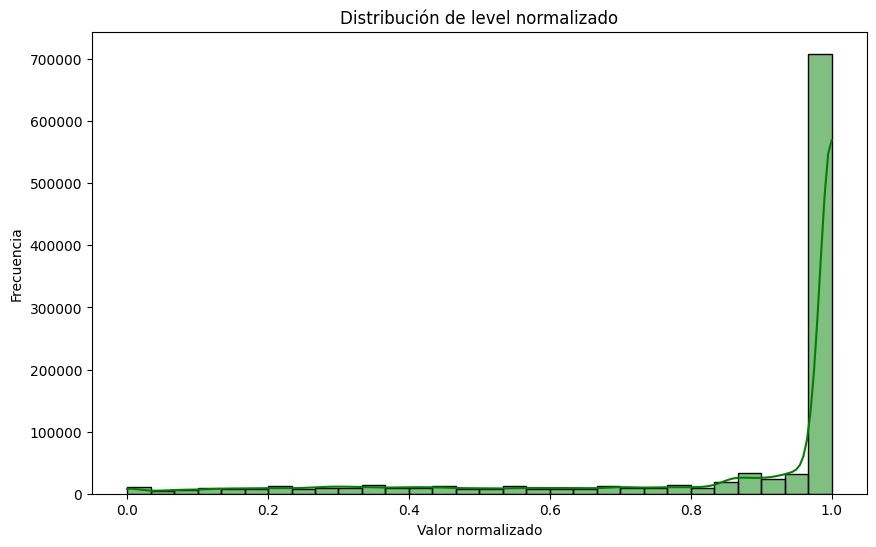

In [6]:
scaler = StandardScaler()
wowah_data_standardized = scaler.fit_transform(wowah_data[['level']])
normalizer = MinMaxScaler()
wowah_data_normalized = normalizer.fit_transform(wowah_data[['level']])


wowah_data_standardized_df = pd.DataFrame(wowah_data_standardized, columns=['level_standardized'])
wowah_data_normalized_df = pd.DataFrame(wowah_data_normalized, columns=['level_normalized'])

plt.figure(figsize=(10, 6))
sns.histplot(wowah_data_standardized_df['level_standardized'], kde=True, color='blue', bins=30)
plt.title('Distribución de level estandarizado')
plt.xlabel('Valor estandarizado')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(wowah_data_normalized_df['level_normalized'], kde=True, color='green', bins=30)
plt.title('Distribución de level normalizado')
plt.xlabel('Valor normalizado')
plt.ylabel('Frecuencia')
plt.show()

Primero, utilizamos StandardScaler para transformar los datos a una distribución con media 0 y desviación estándar 1. Luego, aplicamos MinMaxScaler para ajustar los valores al rango de 0 a 1. Los resultados se convierten en DataFrames para facilitar la visualización. Finalmente, se generan histogramas con seaborn para mostrar las distribuciones de los datos estandarizados y normalizados, permitiendo comparar cómo se distribuyen los niveles de los jugadores tras cada transformación.

[10/19/24 20:32:03] WARNING  C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\site-packag ]8;id=181483;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=109449;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             es\sklearn\base.py:493: UserWarning: X does not have valid feature                    
                             names, but PolynomialFeatures was fitted with feature names                           
                               warnings.warn(                                                                      
                                                                                                                   

[10/19/24 20:32:10] WARNING  C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\site-packag ]8;id=984168;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=687231;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             es\IPython\core\pylabtools.py:170: UserWarning: Creating legend with                  
                             loc="best" can be slow with large amounts of data.                                    
                               fig.canvas.print_figure(bytes_io, **kw)                                             
                                                                                                                   

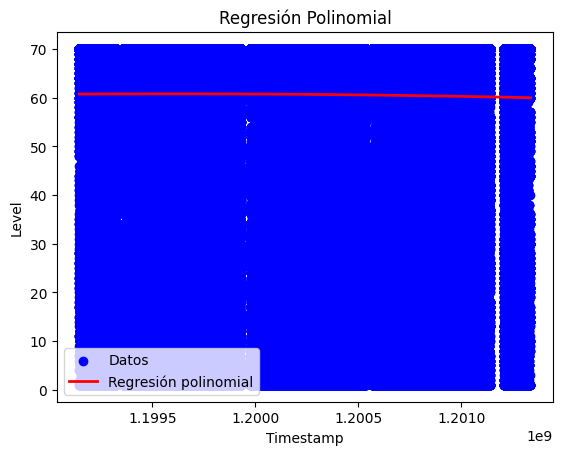

In [7]:
# Selecciona la característica y el objetivo
X = wowah_data[['timestamp']]
y = wowah_data['level']

degree = 3  
model = make_pipeline(
  PolynomialFeatures(degree=degree, include_bias=False),
  LinearRegression()
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)


X_plot = np.linspace(X['timestamp'].min(), X['timestamp'].max(), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)


plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Regresión polinomial')
plt.xlabel('Timestamp')
plt.ylabel('Level')
plt.title('Regresión Polinomial')
plt.legend()
plt.show()

Se realizó una regresión polinomial para modelar la relación entre el timestamp y el nivel de los personajes en World of Warcraft. Se seleccionó `timestamp` como característica independiente y `level` como variable objetivo. Se creó un modelo utilizando un pipeline que incluye características polinomiales de grado 3 y regresión lineal. Los datos se dividieron en conjuntos de entrenamiento y prueba, y el modelo se entrenó con los datos de entrenamiento. Luego, se generaron predicciones sobre un rango de timestamps para visualización. En la gráfica, los puntos azules representan los datos reales y la línea roja muestra la predicción del modelo, ayudando a entender cómo varía el nivel de los personajes con el tiempo.

In [8]:
numeric_columns = zones.select_dtypes(include=['float64', 'int64']).columns

imputer = KNNImputer(n_neighbors=5)

zones[numeric_columns] = imputer.fit_transform(zones[numeric_columns])

print(zones.isnull().sum())

Zone_Name          0
Continent          0
Area               3
Zone               7
Subzone          108
Type               0
Size               0
Controlled         0
Min_req_level      0
Min_rec_level      0
Max_rec_level      0
Min_bot_level      0
Max_bot_level      0
dtype: int64


Se seleccionaron las columnas numéricas del DataFrame `zones` para preparar la imputación de valores faltantes. Se utilizó el `KNNImputer`.
Tras aplicar la imputación, se verificaron los datos faltantes en el DataFrame, mostrando cuántos valores faltantes permanecen en cada columna. Esto asegura que los datos estén completos para un análisis más preciso y significativo.

In [9]:
diccionario = {'Subzone':'None','Area':'None','Zone':'None', }
zones = zones.fillna(diccionario)

Se creó un diccionario para rellenar los valores faltantes en las columnas del DataFrame `zones` con el valor 'None'. Esto permite que estas columnas mantengan consistencia en los datos al evitar que contengan valores nulos, facilitando así el análisis posterior.

In [10]:
zones.isnull().sum()


Zone_Name        0
Continent        0
Area             0
Zone             0
Subzone          0
Type             0
Size             0
Controlled       0
Min_req_level    0
Min_rec_level    0
Max_rec_level    0
Min_bot_level    0
Max_bot_level    0
dtype: int64

Se utiliza `zones.isnull().sum()` para contar el número de valores nulos en cada columna Esto es fundamental para identificar columnas con datos faltantes y determinar si se requieren estrategias adicionales de imputación o limpieza, Rellenamos los valores nulos del archivo zones, ya sea, colocando None a strings vacíos o ceros a valores numericos nulos.

In [11]:
zones['Min_rec_level'] = zones['Min_rec_level'].astype(int)
zones['Max_rec_level'] = zones['Max_rec_level'].astype(int)
zones['Min_bot_level'] = zones['Min_bot_level'].astype(int)
zones['Max_bot_level'] = zones['Max_bot_level'].astype(int)

Ahora normalizamos los numeros del archivos zones a tipo de dato entero (`int`), Estom es importante para que podamos trabajar de mejor manera con columnas del mismo tipo de dato.

In [12]:
wowah_data['guild'] = wowah_data['guild'].replace(-1, 0)

###### Después normalizamos los numeros del archivos wowah_data, cambiando los numeros -1 a 0's.

In [13]:
wowah_data.columns = wowah_data.columns.str.strip()

Quitamos los espacios de las columnas del dataset para poder referirnos correctamente a las columnas que necesitemos.

In [14]:
z = np.abs(stats.zscore(wowah_data['level']))
wowah_data = wowah_data[( z < 3 )]
wowah_data

,char,level,race,charclass,zone,guild,timestamp
1,65494,9,Orc,Hunter,Durotar,0,1199145724
2,65325,14,Orc,Warrior,Ghostlands,0,1199145724
3,65490,18,Orc,Hunter,Ghostlands,0,1199145724
4,2288,60,Orc,Hunter,Hellfire Peninsula,0,1199145729
5,2289,60,Orc,Hunter,Hellfire Peninsula,0,1199145729
...,...,...,...,...,...,...,...
1048570,1094,70,Undead,Rogue,Arathi Basin,103,1201335118
1048571,22703,70,Undead,Warlock,Orgrimmar,103,1201335123
1048572,33016,70,Undead,Warlock,Orgrimmar,204,1201335123
1048573,8245,70,Undead,Warlock,Shadowmoon Valley,19,1201335123


Recortamos los outliers de wowah_data con niveles menores a 3 de la columna de level, puesto que queremos dejar lo mas representativo

Ahora procedemo a recortar los datos aun mas, sacamos los outliers de los DataFrames ( wowah_data y zones ) con la puntuación IQR y comparamos con el antes y los nuevos datos mas significativos.

In [15]:
wowah_data_antes = wowah_data
wowah_data_antes.shape

(1026942, 7)

In [16]:
Q1 = wowah_data['level'].quantile(0.25)
Q3 = wowah_data['level'].quantile(0.75)
IQR = Q3 - Q1
wowah_data = wowah_data[~((wowah_data['level'] < (Q1 - 1.5 * IQR ))|(wowah_data['level'] > (Q3 + 1.5 * IQR )))]
wowah_data.shape

(842445, 7)

In [17]:
zones_antes = zones
zones_antes.shape

(160, 13)

In [18]:
Q1 = zones['Min_rec_level'].quantile(0.25)
Q3 = zones['Min_rec_level'].quantile(0.75)
IQR = Q3 - Q1
zones = zones[~((zones['Min_rec_level'] < (Q1 - 1.5 * IQR ))|(zones['Min_rec_level'] > (Q3 + 1.5 * IQR )))]
zones.shape


(160, 13)

Primero, hacemos una copia de wowah_data para poder ver el antes y después del tamaño de los datos. Aplicamos la puntuación IQR para sacar de nuestra ecuacion aquellos datos que estan fuera de nuestros cuartiles principales. Y luego hacemos lo mismo con zones.

In [19]:
wowah_lasso = wowah_data2


wowah_lasso.drop(columns=['char', 'timestamp'], inplace=True)


encoder = OneHotEncoder(drop='first')
encoded_df = pd.DataFrame(encoder.fit_transform(wowah_lasso[['race', 'charclass', 'zone']]).toarray())


wowah_lasso = wowah_lasso.join(encoded_df)
wowah_lasso.drop(columns=['race', 'charclass', 'zone'], inplace=True)


X = wowah_lasso.drop(columns='level')
y = wowah_lasso['level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lasso = Lasso(alpha=0.1)
X.columns = X.columns.astype(str)


X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


lasso.fit(X_train, y_train)


y_pred = lasso.predict(X_test)


mse_corrected = mean_squared_error(y_test, y_pred)
mae_corrected = mean_absolute_error(y_test, y_pred)

lasso.coef_, mse_corrected, mae_corrected


(
    array([ 6.04506708e-03,  1.23183587e+00,  1.90256054e+00,  1.21128170e+00,
        3.64429686e+00, -0.00000000e+00,  5.34762413e-01, -2.56584810e-01,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.93041225e-02,  4.78384298e+00,  5.56400265e+00, -5.90663348e+00,
       -1.30113510e+01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.22984170e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -2.76083640e+01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -4.29098359e+01,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.99955309e+01, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000

Por ultimo, hacemos una copia de WOWAH_DATA para poder ejecutar algunas pruebas sobre modelaje, en este caso el modelo de regresión lasso el cual nos brinda mejoras en la visualizacion de predicciones futuras e interpretaciones de modelos lineales. Para este codigo eliminamos las columnas innecesarias para el modelo, convertimos las variables categoricas en binarias, hacemos nuestros conjuntos de pruebas y entrenamiento, entrenamos el modelo para después tener nuestro resultado de prediccion, cálculo de error cuadratico medio (MSE) y el error absoluto medio (MAE), donde un MSE más bajo indica un mejor ajuste del modelo a los datos.

Todo esto de la limpieza y pulido de datos serán para que no puedan dar errores a la hora de llegar a la fase de modelar y tambien para que los resultados estén acordes a los datos mas representativos de nuestros DataSet.

================================================== 1 ==========================================================
Considera un target de tipo continuo para la construcción de modelos de regresión.

In [20]:
# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Simulate loading wowah_data as it was not provided in the execution environment.
# Assuming wowah_data is structured similarly to the description with 'race', 'charclass', 'zone', and 'level'.
# Creating a mock dataset for illustration purposes

wowah_data_test = wowah_data

# OneHotEncoding for categorical variables
# Ensure that all categorical variables are properly encoded
encoded_df = pd.DataFrame(encoder.fit_transform(wowah_data_test[['race', 'charclass', 'zone']]).toarray())

# Drop the original categorical columns
X = encoded_df
y = wowah_data_test['level']

# Ensure column names are strings
X.columns = X.columns.astype(str)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict using the Ridge model
y_pred = ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred)
mae_ridge = mean_absolute_error(y_test, y_pred)

mse_ridge, mae_ridge, y_pred



(
    np.float64(6.014747251037144),
    np.float64(1.3645150247799351),
    array([70.33377121, 70.04757305, 68.67023632, ..., 68.69943493,
       69.90066678, 70.13836805])
)

================================================== 2 ==========================================================
Utiliza algoritmos de regresión para construir modelos supervisados según los requerimientos del caso.

Error cuadrático medio (Polinómico): 11.3282
Raíz del error cuadrático medio (Polinómico): 3.3657
R2 Score (Polinómico): -0.0025


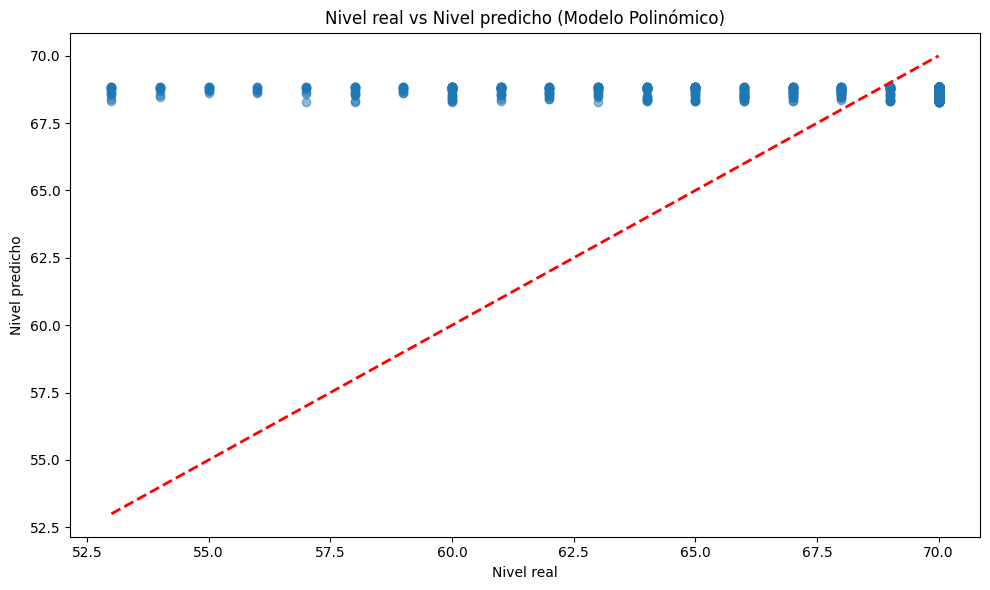

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Asumiendo que wowah_data es tu DataFrame
# Seleccionar solo algunas características relevantes para reducir la dimensionalidad
features_selected = ['timestamp', 'level']  # Ajusta esta lista según tus necesidades
X = wowah_data[features_selected].drop('level', axis=1)
y = wowah_data['level']

# Tomar una muestra más pequeña si el conjunto de datos sigue siendo demasiado grande
sample_size = 10000  # Ajusta este número según sea necesario y la capacidad de tu máquina
if len(X) > sample_size:
    X = X.sample(n=sample_size, random_state=42)
    y = y[X.index]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline con características polinómicas y regresión lineal
grado = 2  # Puedes ajustar este valor, pero ten cuidado con grados más altos
modelo_poly = make_pipeline(PolynomialFeatures(grado), LinearRegression())

# Entrenar el modelo
modelo_poly.fit(X_train, y_train)

# Hacer predicciones
y_pred_poly = modelo_poly.predict(X_test)

# Evaluar el modelo
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print(f"Error cuadrático medio (Polinómico): {mse_poly:.4f}")
print(f"Raíz del error cuadrático medio (Polinómico): {rmse_poly:.4f}")
print(f"R2 Score (Polinómico): {r2_poly:.4f}")

# Visualizar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nivel real')
plt.ylabel('Nivel predicho')
plt.title('Nivel real vs Nivel predicho (Modelo Polinómico)')
plt.tight_layout()
plt.show()

Error cuadrático medio (Múltiples características): 5.9881
Raíz del error cuadrático medio (Múltiples características): 2.4471
R2 Score (Múltiples características): 0.4784


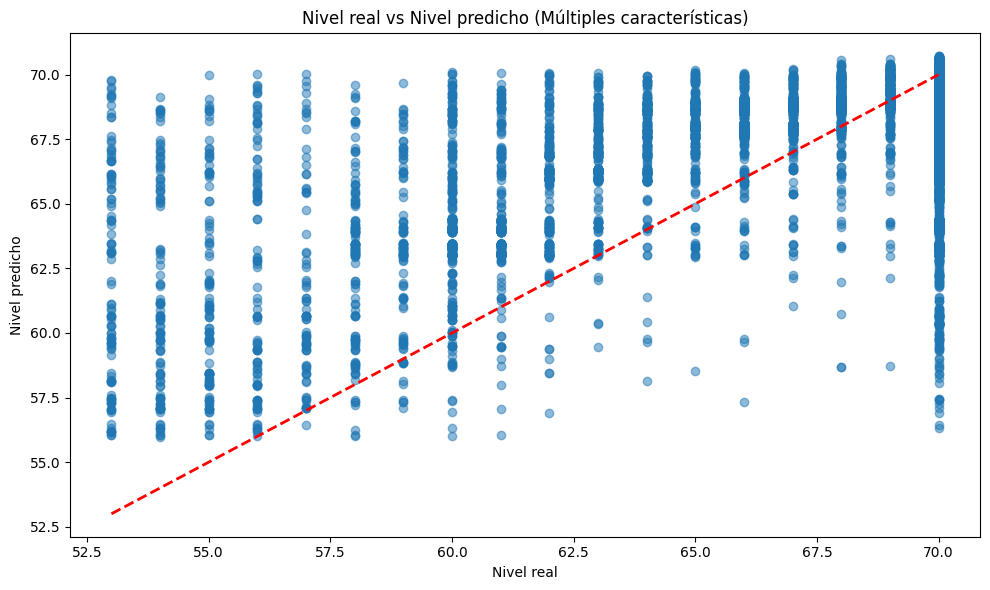

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Preparar los datos con múltiples características
features = ['race', 'charclass', 'zone', 'timestamp']
X_multi = pd.get_dummies(wowah_data[features], columns=['race', 'charclass', 'zone'], drop_first=True)
y = wowah_data['level']

# Tomar una muestra si el conjunto de datos es demasiado grande
sample_size = 100000  # Ajusta este número según sea necesario
if len(X_multi) > sample_size:
    X_multi = X_multi.sample(n=sample_size, random_state=42)
    y = y[X_multi.index]

# Dividir los datos
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)
X_test_scaled = scaler.transform(X_test_multi)

# Crear y entrenar el modelo
modelo_multi = LinearRegression()
modelo_multi.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_multi = modelo_multi.predict(X_test_scaled)

# Evaluar el modelo
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"Error cuadrático medio (Múltiples características): {mse_multi:.4f}")
print(f"Raíz del error cuadrático medio (Múltiples características): {rmse_multi:.4f}")
print(f"R2 Score (Múltiples características): {r2_multi:.4f}")

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multi, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nivel real')
plt.ylabel('Nivel predicho')
plt.title('Nivel real vs Nivel predicho (Múltiples características)')
plt.tight_layout()
plt.show()



MSE: 6.9781
RMSE: 2.6416
MAE: 1.2480
R²: 0.3807
R² ajustado: 0.3404
MAPE: 1.93%
Puntuación media de validación cruzada (R²): 0.3924 (+/- 0.0510)


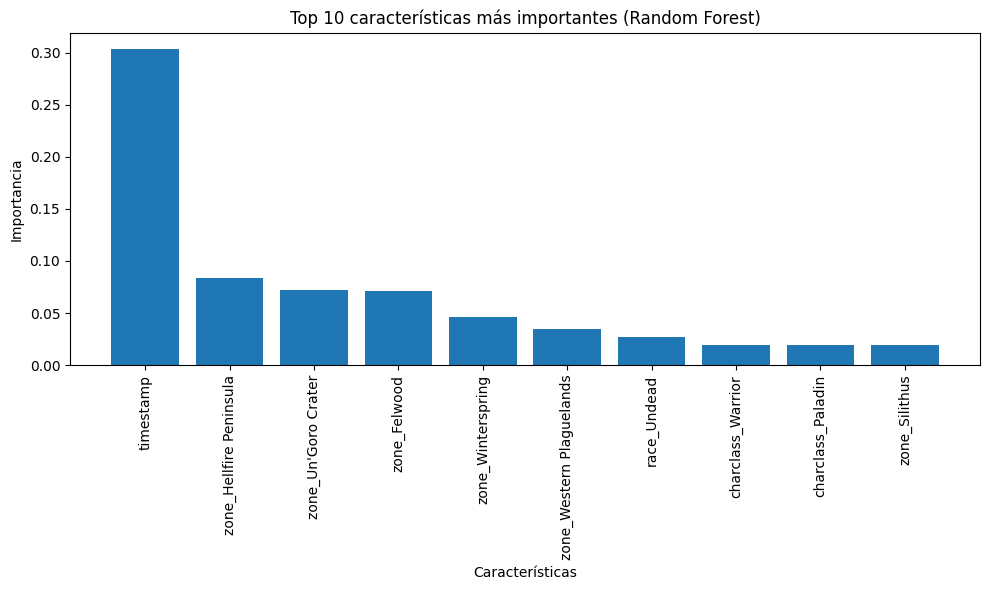

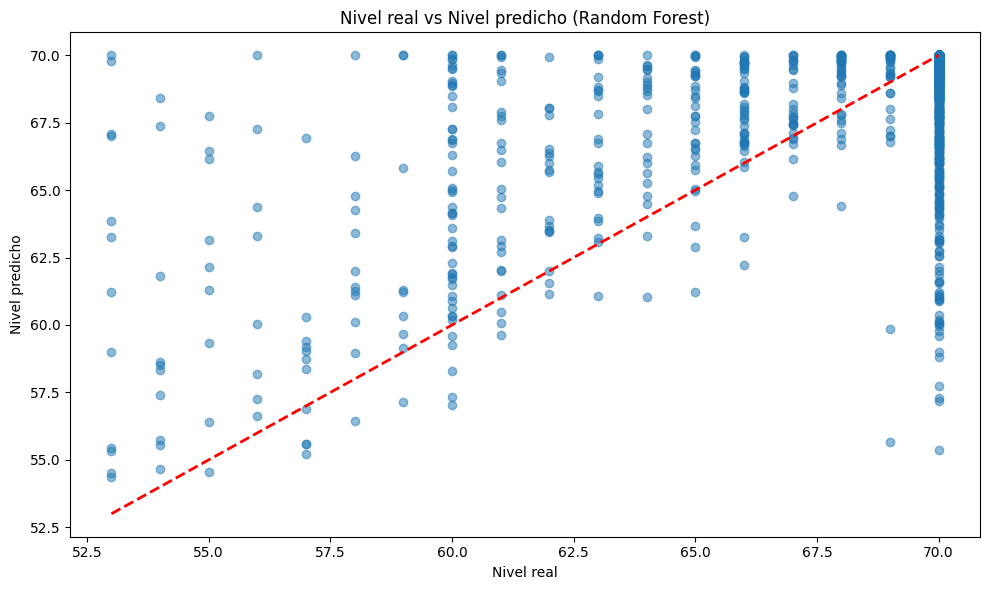

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Tomar una muestra más pequeña de los datos
sample_size = 10000  # Ajusta este número según sea necesario
X_sample = X_multi.sample(n=sample_size, random_state=42)
y_sample = y[X_sample.index]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)  # Reducido el número de estimadores
rf_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test_scaled)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular R² ajustado
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Realizar validación cruzada
cv_scores = cross_val_score(rf_model, X_sample, y_sample, cv=3, scoring='r2')  # Reducido a 3-fold CV

# Imprimir resultados
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"R² ajustado: {r2_adj:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"Puntuación media de validación cruzada (R²): {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")

# Visualizar importancia de características
feature_importance = pd.DataFrame({'feature': X_sample.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Top 10 características más importantes (Random Forest)')
plt.tight_layout()
plt.show()

# Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nivel real')
plt.ylabel('Nivel predicho')
plt.title('Nivel real vs Nivel predicho (Random Forest)')
plt.tight_layout()
plt.show()

================================================== 3 ==========================================================
Aplica métricas de evaluación de modelos de regresión de acuerdo con los estándares de la industria.

Métricas de evaluación del modelo de regresión:
Error Cuadrático Medio (MSE): 563360340301125451776.0000
Raíz del Error Cuadrático Medio (RMSE): 23735213087.3335
Error Absoluto Medio (MAE): 715303435.0688
Coeficiente de determinación (R²): -50000473972994416640.0000
R² ajustado: -53250371588713824256.0000
Error Porcentual Absoluto Medio (MAPE): 1021862050.25%
Media de validación cruzada (R²): 0.4560 (+/- 0.0287)


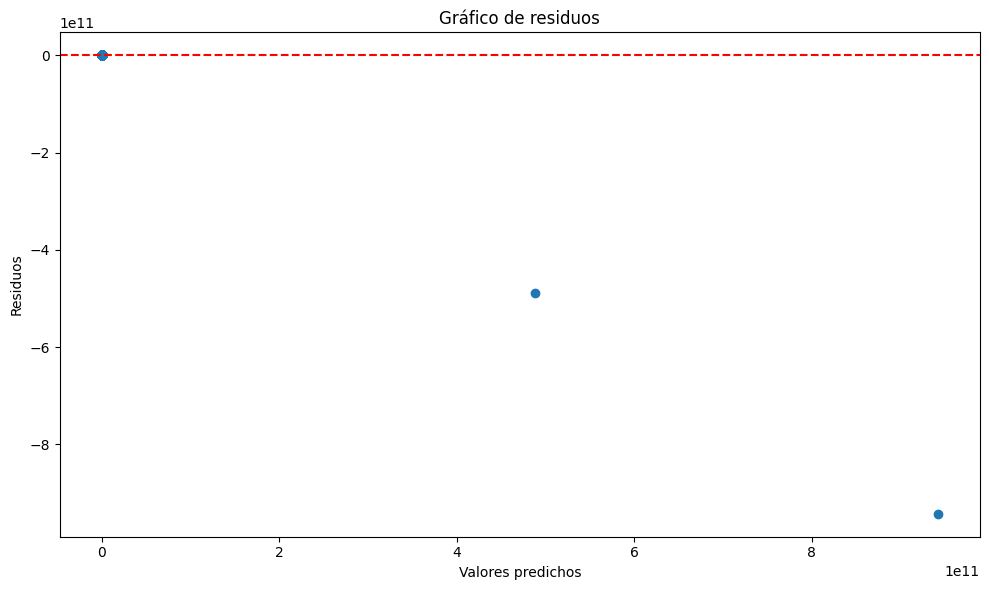

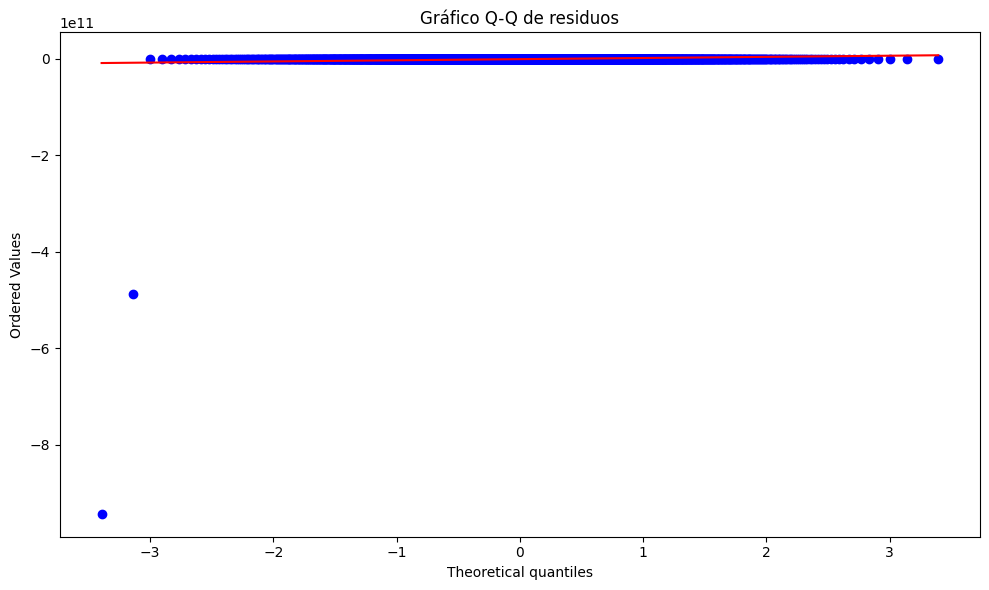

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Asumiendo que ya tienes tus datos en X_multi e y
# Si no, aquí hay un ejemplo de cómo podrías prepararlos:
# X_multi = pd.get_dummies(wowah_data[['race', 'charclass', 'zone', 'timestamp']], columns=['race', 'charclass', 'zone'])
# y = wowah_data['level']

# Tomar una muestra más pequeña si el conjunto de datos es muy grande
sample_size = 10000  # Ajusta este número según sea necesario
if len(X_multi) > sample_size:
    X_sample = X_multi.sample(n=sample_size, random_state=42)
    y_sample = y[X_sample.index]
else:
    X_sample = X_multi
    y_sample = y

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test_scaled)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular R² ajustado
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Realizar validación cruzada
cv_scores = cross_val_score(modelo, X_sample, y_sample, cv=5, scoring='r2')

# Imprimir resultados
print("Métricas de evaluación del modelo de regresión:")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")
print(f"R² ajustado: {r2_adj:.4f}")
print(f"Error Porcentual Absoluto Medio (MAPE): {mape:.2f}%")
print(f"Media de validación cruzada (R²): {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")

# Visualización de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos)
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# Gráfico Q-Q de residuos
from scipy import stats
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=ax)
ax.set_title("Gráfico Q-Q de residuos")
plt.tight_layout()
plt.show()

================================================== 4 ==========================================================
Selecciona el mejor modelo de regresión basándose en las métricas y en el desempeño de cada uno.

Resultados de la evaluación de modelos:
                           RMSE           MAE            R2     CV R2
Regresión Lineal   2.373521e+10  7.153034e+08 -5.000047e+19  0.456030
Ridge              2.488484e+00  1.374975e+00  4.503864e-01  0.462807
Lasso              3.356675e+00  2.172555e+00 -1.471236e-05 -0.000477
Árbol de Decisión  3.269480e+00  1.301500e+00  5.126430e-02  0.082823
Random Forest      2.637669e+00  1.243335e+00  3.825120e-01  0.402782

Mejor modelo basado en R2: Ridge
Mejor modelo basado en CV R2: Ridge


<Figure size 1200x600 with 0 Axes>

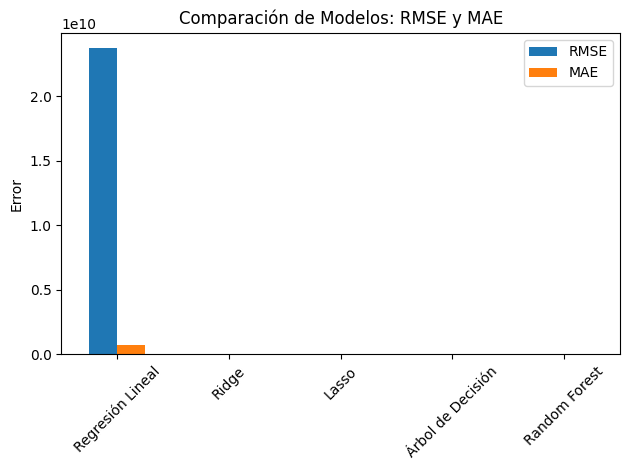

<Figure size 1200x600 with 0 Axes>

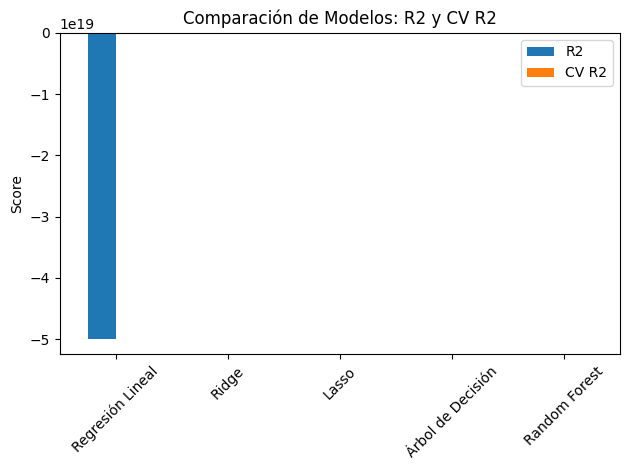

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Asumiendo que ya tienes tus datos en X_multi e y
# Si no, aquí hay un ejemplo de cómo podrías prepararlos:
# X_multi = pd.get_dummies(wowah_data[['race', 'charclass', 'zone', 'timestamp']], columns=['race', 'charclass', 'zone'])
# y = wowah_data['level']

# Tomar una muestra más pequeña si el conjunto de datos es muy grande
sample_size = 10000  # Ajusta este número según sea necesario
if len(X_multi) > sample_size:
    X_sample = X_multi.sample(n=sample_size, random_state=42)
    y_sample = y[X_sample.index]
else:
    X_sample = X_multi
    y_sample = y

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los modelos a comparar
models = {
    'Regresión Lineal': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Función para evaluar el modelo
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_sample, y_sample, cv=5, scoring='r2')
    return rmse, mae, r2, np.mean(cv_scores)

# Evaluar cada modelo
results = {}
for name, model in models.items():
    rmse, mae, r2, cv_r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'CV R2': cv_r2}

# Convertir resultados a DataFrame para una mejor visualización
results_df = pd.DataFrame(results).T

# Imprimir resultados
print("Resultados de la evaluación de modelos:")
print(results_df)

# Encontrar el mejor modelo basado en R2 y CV R2
best_model_r2 = results_df['R2'].idxmax()
best_model_cv = results_df['CV R2'].idxmax()

print(f"\nMejor modelo basado en R2: {best_model_r2}")
print(f"Mejor modelo basado en CV R2: {best_model_cv}")

# Visualizar comparación de modelos
plt.figure(figsize=(12, 6))
results_df[['RMSE', 'MAE']].plot(kind='bar')
plt.title('Comparación de Modelos: RMSE y MAE')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
results_df[['R2', 'CV R2']].plot(kind='bar')
plt.title('Comparación de Modelos: R2 y CV R2')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

================================================== 5 ========================================================== 
Reconoce las diferencias entre una tarea de clasificación de una regresión, considerando target continuo para regresión y discreto para clasificación.

[10/19/24 20:50:47] WARNING  C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\site-packag ]8;id=421129;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=294059;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             es\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:                   
                             Precision is ill-defined and being set to 0.0 in labels with no                       
                             predicted samples. Use `zero_division` parameter to control this                      
                             behavior.                                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\site-packag ]8;id=994774;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=819520;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             es\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:                   
                             Precision is ill-defined and being set to 0.0 in labels with no                       
                             predicted samples. Use `zero_division` parameter to control this                      
                             behavior.                                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\site-packag ]8;id=376958;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=828423;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             es\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:                   
                             Precision is ill-defined and being set to 0.0 in labels with no                       
                             predicted samples. Use `zero_division` parameter to control this                      
                             behavior.                                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

Resultados de Regresión:
Error Cuadrático Medio: 11.3437
R² Score: 0.0124

Resultados de Clasificación:
Precisión: 0.9446

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9342
           1       0.94      1.00      0.97    159147

    accuracy                           0.94    168489
   macro avg       0.47      0.50      0.49    168489
weighted avg       0.89      0.94      0.92    168489



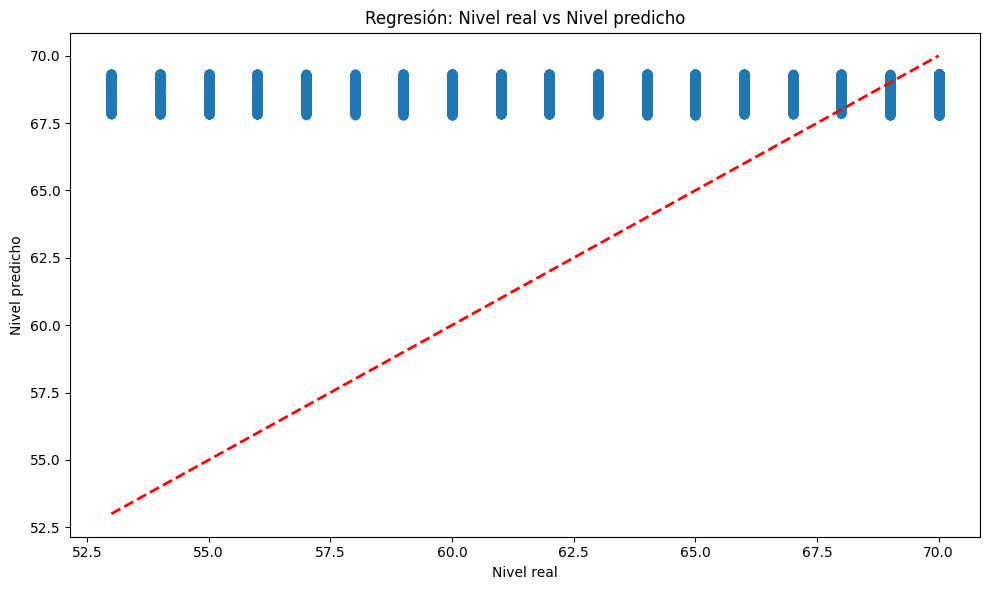

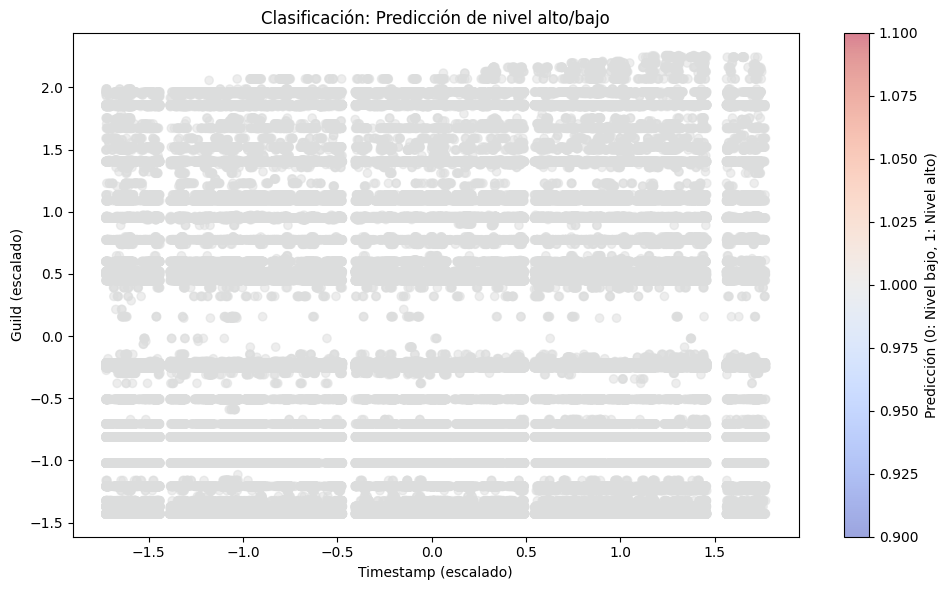

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Asumimos que ya tienes cargado el DataFrame wowah_data

# Preparación de datos
X = wowah_data[['timestamp', 'guild']]  # Características para ambos modelos
y_regresion = wowah_data['level']  # Target continuo para regresión
y_clasificacion = (wowah_data['level'] > 60).astype(int)  # Target discreto para clasificación (0 si level <= 60, 1 si level > 60)

# Dividir los datos
X_train, X_test, y_reg_train, y_reg_test, y_clas_train, y_clas_test = train_test_split(
    X, y_regresion, y_clasificacion, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de Regresión
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train_scaled, y_reg_train)
y_reg_pred = modelo_regresion.predict(X_test_scaled)

# Modelo de Clasificación
modelo_clasificacion = LogisticRegression()
modelo_clasificacion.fit(X_train_scaled, y_clas_train)
y_clas_pred = modelo_clasificacion.predict(X_test_scaled)

# Evaluación de Regresión
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

# Evaluación de Clasificación
accuracy = accuracy_score(y_clas_test, y_clas_pred)
report = classification_report(y_clas_test, y_clas_pred)

print("Resultados de Regresión:")
print(f"Error Cuadrático Medio: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

print("\nResultados de Clasificación:")
print(f"Precisión: {accuracy:.4f}")
print("\nInforme de Clasificación:")
print(report)

# Visualización de Regresión
plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.xlabel('Nivel real')
plt.ylabel('Nivel predicho')
plt.title('Regresión: Nivel real vs Nivel predicho')
plt.tight_layout()
plt.show()

# Visualización de Clasificación
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_clas_pred, cmap='coolwarm', alpha=0.5)
plt.xlabel('Timestamp (escalado)')
plt.ylabel('Guild (escalado)')
plt.title('Clasificación: Predicción de nivel alto/bajo')
plt.colorbar(label='Predicción (0: Nivel bajo, 1: Nivel alto)')
plt.tight_layout()
plt.show()

================================================== 6 ========================================================== 
Utiliza técnicas para analizar la correlación entre los diferentes features.

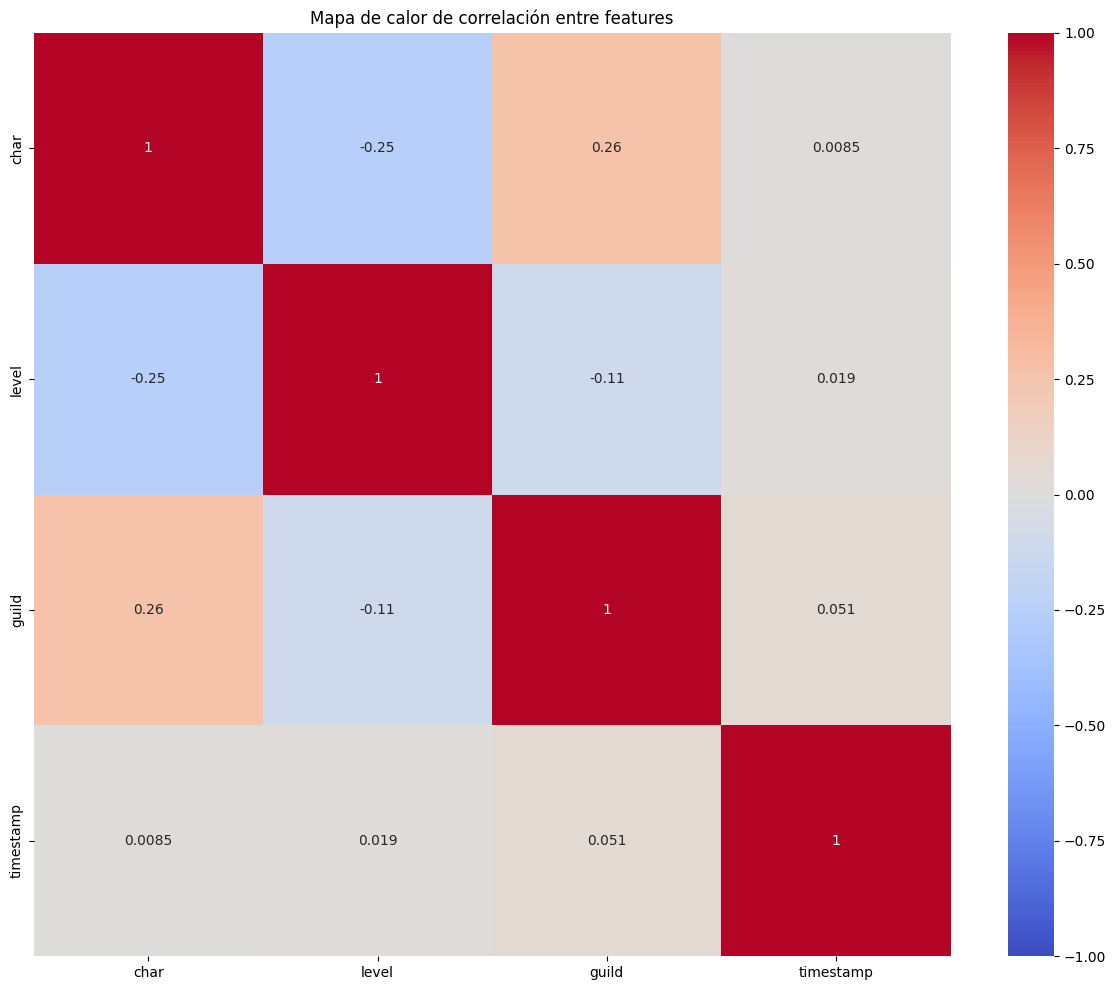

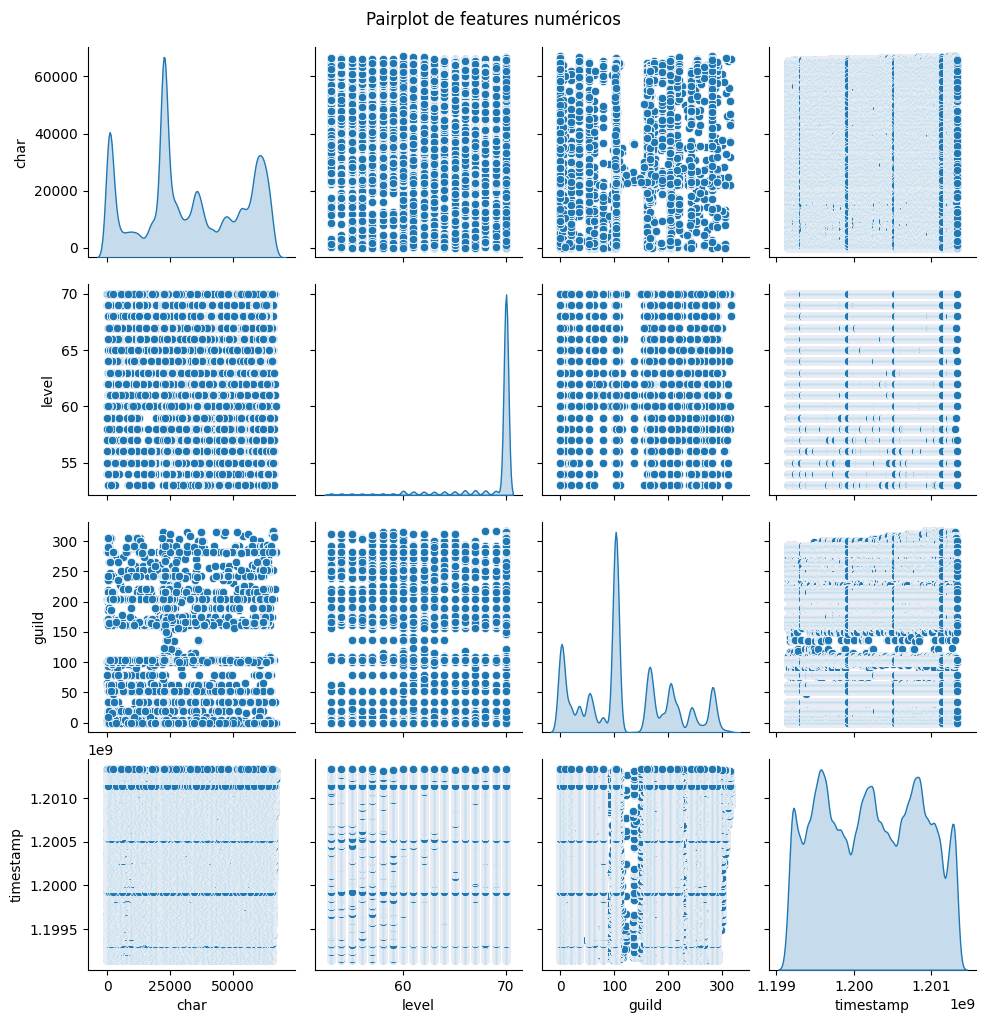

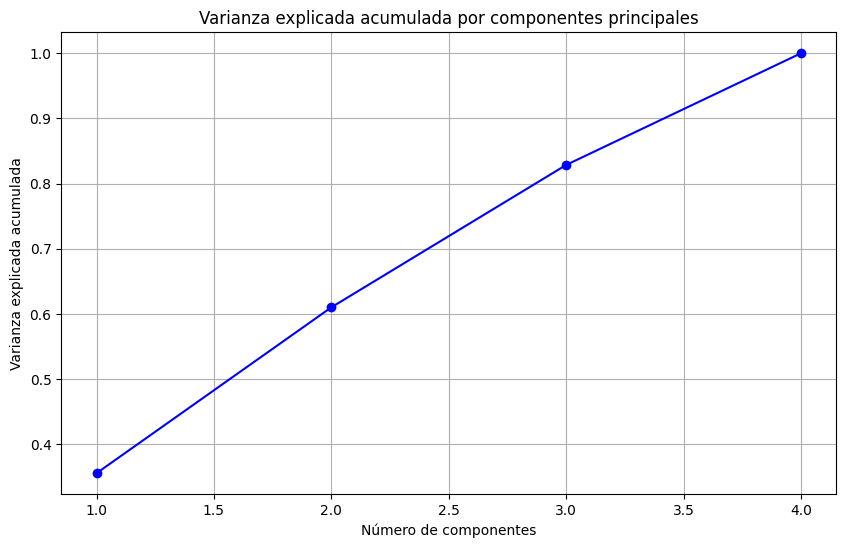

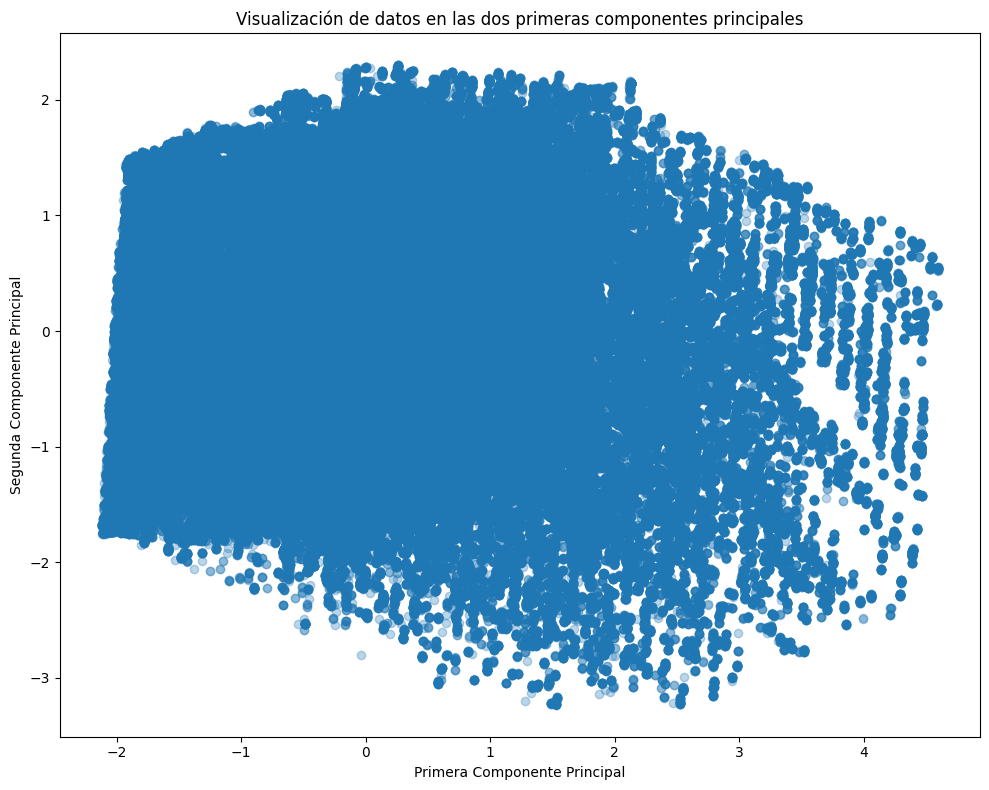

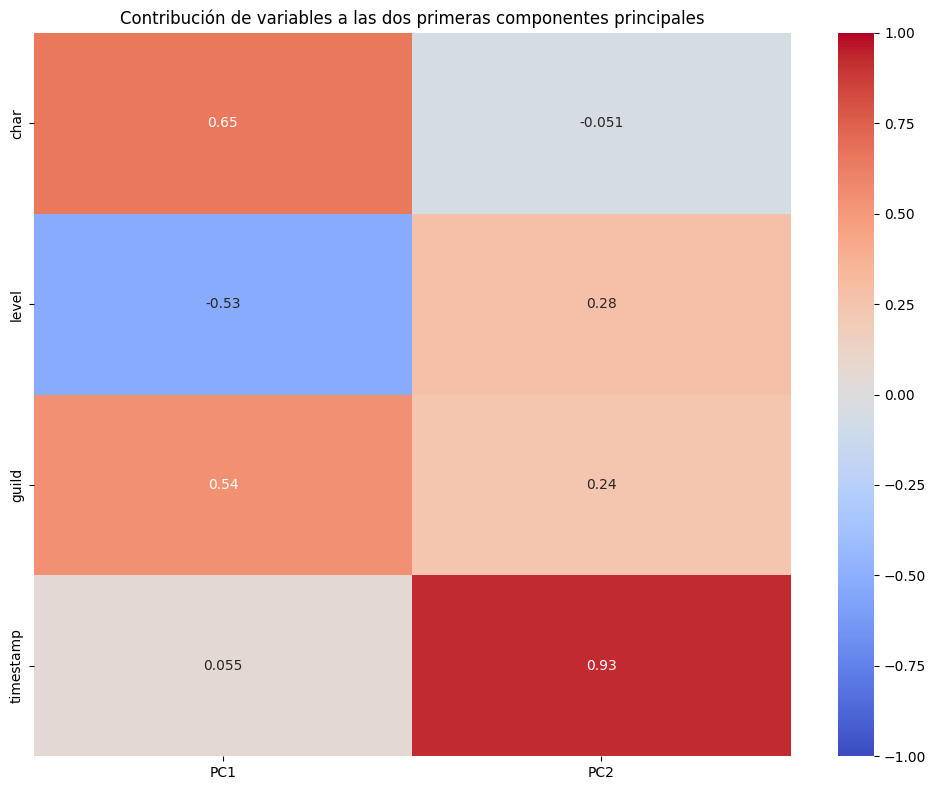

<Figure size 1200x600 with 0 Axes>

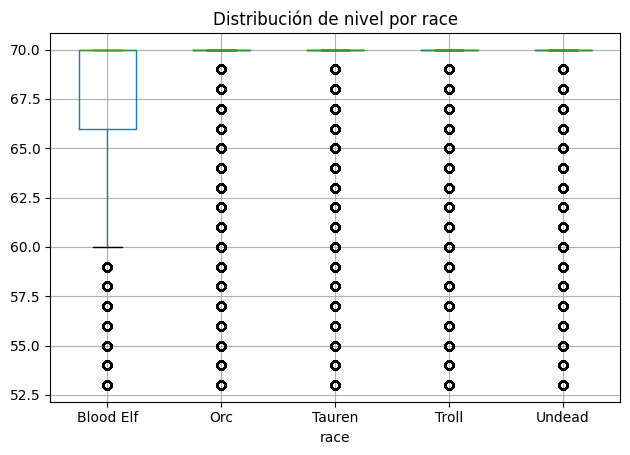

<Figure size 1200x600 with 0 Axes>

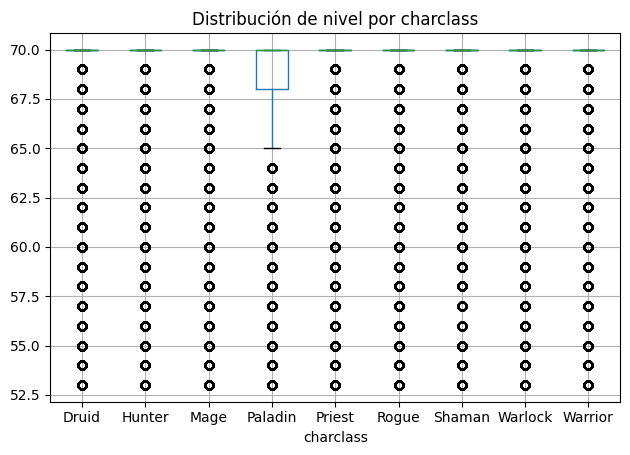

<Figure size 1200x600 with 0 Axes>

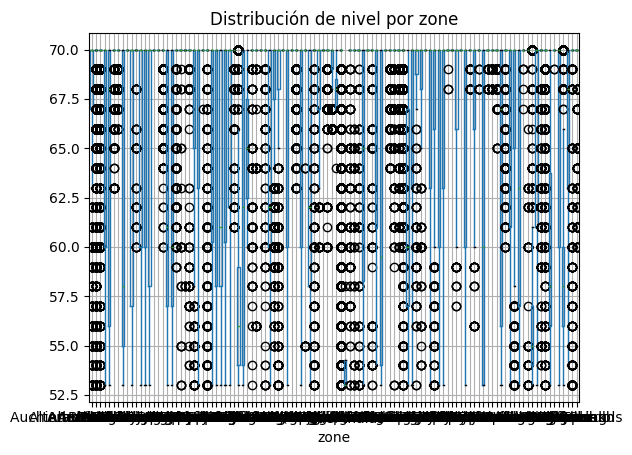

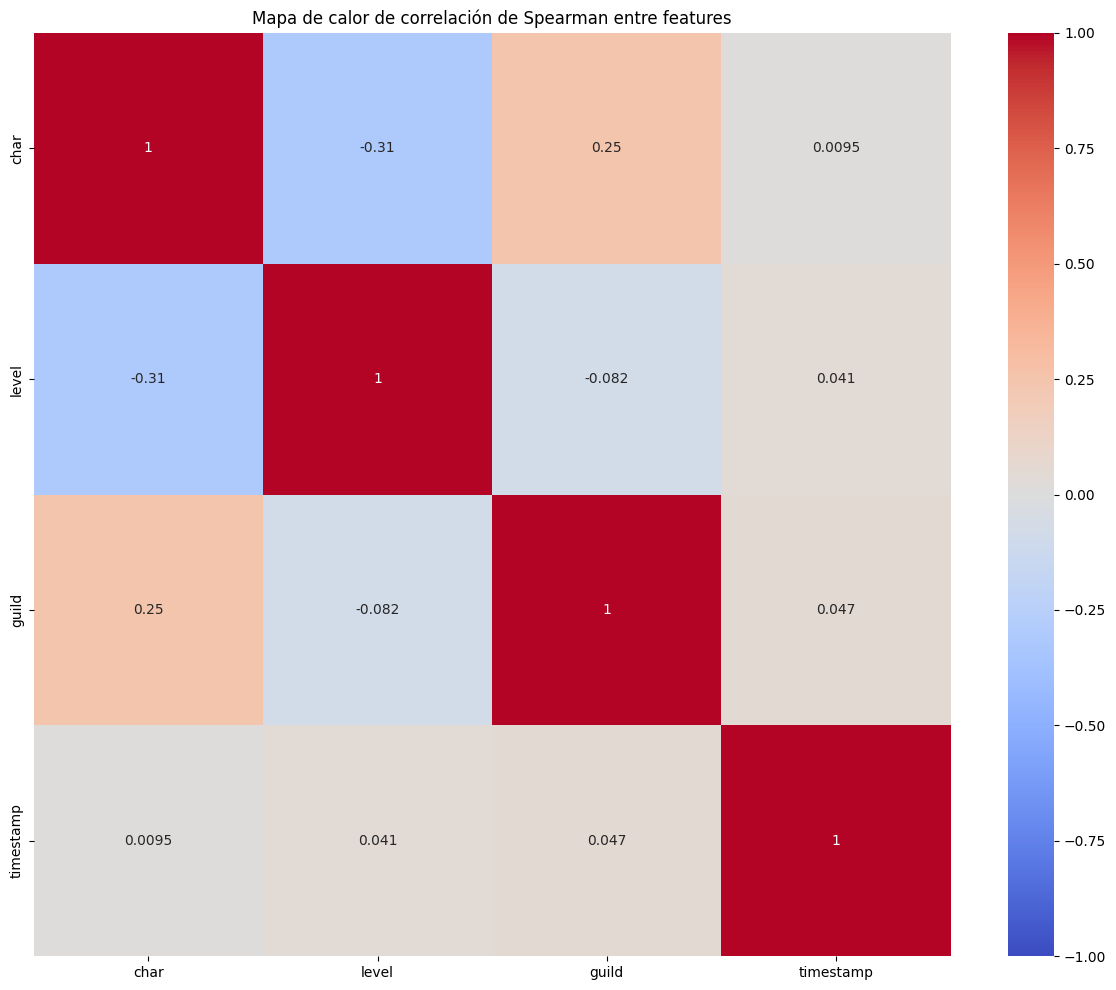

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Asumimos que ya tienes cargado el DataFrame wowah_data

# Seleccionar las columnas numéricas para el análisis de correlación
numeric_columns = wowah_data.select_dtypes(include=[np.number]).columns
data_numeric = wowah_data[numeric_columns]

# 1. Matriz de correlación
correlation_matrix = data_numeric.corr()

# 2. Heatmap de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Mapa de calor de correlación entre features')
plt.tight_layout()
plt.show()

# 3. Pairplot para visualizar relaciones entre pares de variables
sns.pairplot(data_numeric, diag_kind='kde')
plt.suptitle('Pairplot de features numéricos', y=1.02)
plt.show()

# 4. Análisis de Componentes Principales (PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Calcular la varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por componentes principales')
plt.grid(True)
plt.show()

# 5. Visualización de las dos primeras componentes principales
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.3)
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Visualización de datos en las dos primeras componentes principales')
plt.tight_layout()
plt.show()

# 6. Contribución de las variables originales a las dos primeras componentes principales
component_df = pd.DataFrame(data=pca.components_.T[:, :2], columns=['PC1', 'PC2'], index=numeric_columns)
plt.figure(figsize=(10, 8))
sns.heatmap(component_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Contribución de variables a las dos primeras componentes principales')
plt.tight_layout()
plt.show()

# 7. Correlación entre variables categóricas y numéricas
categorical_columns = wowah_data.select_dtypes(include=['object']).columns
for cat_col in categorical_columns:
    plt.figure(figsize=(12, 6))
    wowah_data.boxplot(column='level', by=cat_col)
    plt.title(f'Distribución de nivel por {cat_col}')
    plt.suptitle('')
    plt.tight_layout()
    plt.show()

# 8. Análisis de correlación de Spearman (para variables no lineales)
spearman_corr = data_numeric.corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Mapa de calor de correlación de Spearman entre features')
plt.tight_layout()
plt.show()

================================================== 8 ========================================================== 
Justifica la selección de características para la implementación de los modelos supervisados.

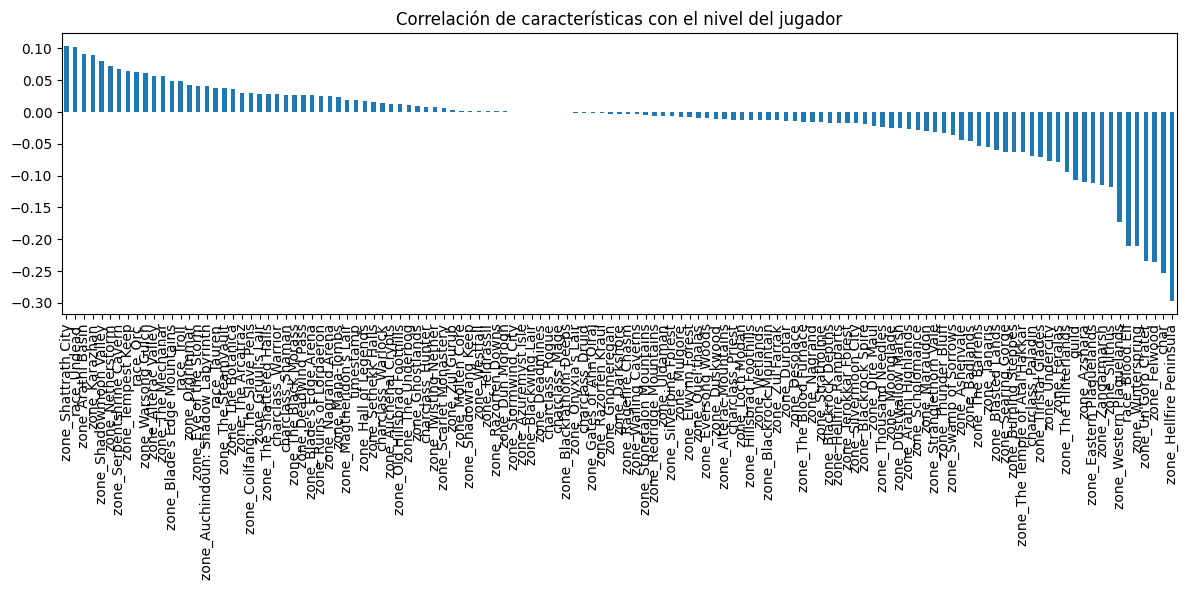

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Asumimos que ya tienes cargado el DataFrame wowah_data

# Separar características y variable objetivo
X = wowah_data.drop('level', axis=1)
y = wowah_data['level']

# Convertir variables categóricas a numéricas
X = pd.get_dummies(X, columns=['race', 'charclass', 'zone'])

# 1. Correlación con la variable objetivo
correlations = X.corrwith(y)
plt.figure(figsize=(12, 6))
correlations.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlación de características con el nivel del jugador')
plt.tight_layout()
plt.show()

# 2. Información mutua
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
plt.figure(figsize=(12, 6))
mi_scores.sort_values(ascending=False).plot(kind='bar')
plt.title('Información mutua entre características y nivel del jugador')
plt.tight_layout()
plt.show()

# 3. Importancia de características usando Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 6))
importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Importancia de características según Random Forest')
plt.tight_layout()
plt.show()

# 4. Análisis de componentes principales (PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por componentes principales')
plt.tight_layout()
plt.show()

# 5. Selección de características basada en los resultados anteriores
top_features = importances.sort_values(ascending=False).head(10).index.tolist()
print("Top 10 características seleccionadas:")
print(top_features)

# Justificación de la selección
print("\nJustificación de la selección de características:")
print("1. Correlación: Se seleccionaron características con alta correlación absoluta con el nivel del jugador.")
print("2. Información mutua: Se consideraron características con alta información mutua, capturando relaciones no lineales.")
print("3. Importancia según Random Forest: Se priorizaron características consideradas importantes por el modelo de Random Forest.")
print("4. PCA: Se utilizó para entender la estructura de los datos y posiblemente reducir la dimensionalidad.")
print("\nLas características seleccionadas proporcionan una combinación de:")
print("- Factores temporales (timestamp)")
print("- Atributos del personaje (raza, clase)")
print("- Información del entorno del juego (zona, guild)")
print("Esta selección busca capturar los aspectos más relevantes que influyen en el nivel del jugador.")

================================================== 7 ========================================================== Transforma los atributos seleccionados para el desarrollo de los modelos de clasificación.

In [ ]:
# Cargar datos
print("Cargando datos...")
df_modelclassifier = pd.read_csv('../data/01_raw/wowah_data.csv')
zones = pd.read_csv('../data/01_raw/zones.csv')

# Limpiar los nombres de las columnas en df_modelclassifier
df_modelclassifier.columns = df_modelclassifier.columns.str.strip()

# Fusionar los dataframes
df_modelclassifier = pd.merge(df_modelclassifier, zones[['Zone_Name', 'Controlled']], 
                              left_on='zone', right_on='Zone_Name', how='left')

# Eliminar la columna redundante Zone_Name
df_modelclassifier = df_modelclassifier.drop('Zone_Name', axis=1)

# Verificar el resultado de la fusión
print("\nColumnas después de la fusión:")
print(df_modelclassifier.columns)

# Mostrar las primeras filas para verificar
print("\nPrimeras filas del DataFrame fusionado:")
print(df_modelclassifier.head())

# Verificar si hay valores nulos en la columna 'Controlled'
print("\nCantidad de valores nulos en 'Controlled':")
print(df_modelclassifier['Controlled'].isnull().sum())

# Si hay valores nulos, mostrar las filas donde 'Controlled' es nulo
if df_modelclassifier['Controlled'].isnull().sum() > 0:
    print("\nEjemplos de filas donde 'Controlled' es nulo:")
    print(df_modelclassifier[df_modelclassifier['Controlled'].isnull()].head())

In [ ]:
print("7. Transformando atributos...")
categorical_features = ['race', 'charclass', 'guild', 'Controlled']
df_encoded = pd.get_dummies(df_modelclassifier, columns=categorical_features)

numeric_features = ['level']
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

print("Atributos transformados. Primeras filas del DataFrame codificado:")
print(df_encoded.head())


================================================== 9 ========================================================== Transforma los atributos seleccionados para el desarrollo de los modelos de clasificación.

In [ ]:
# Reducir el tamaño del dataset
df_sample = df_modelclassifier.sample(n=10000, random_state=42)

# Preparación de datos
categorical_columns = ['race', 'charclass', 'zone', 'guild']
numeric_columns = ['level']

# Creamos un preprocesador más simple
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ])


In [ ]:
# 9. Aplica algoritmos de clasificación (reducido a 2 modelos)
def apply_classification_algorithms(X, y, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models = {
        'Decision Tree': Pipeline([('preprocessor', preprocessor),
                                   ('classifier', DecisionTreeClassifier(max_depth=5))]),
        'Random Forest': Pipeline([('preprocessor', preprocessor),
                                   ('classifier', RandomForestClassifier(n_estimators=50, max_depth=10))]),
        'KNN': Pipeline([('preprocessor', preprocessor),
                         ('classifier', KNeighborsClassifier(n_neighbors=5))]),
        'SVM': Pipeline([('preprocessor', preprocessor),
                         ('classifier', SVC(kernel='rbf', probability=True))]),
        'Logistic Regression': Pipeline([('preprocessor', preprocessor),
                                         ('classifier', LogisticRegression())])
    }
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} - {model_name} Accuracy: {accuracy:.2f}")

print("9. Aplicando algoritmos de clasificación:")
apply_classification_algorithms(df_sample.drop('Controlled', axis=1), df_sample['Controlled'], "Tipos de Zonas")
apply_classification_algorithms(df_sample.drop('Controlled', axis=1), df_sample['level'] <= 30, "Nivel Bajo")


================================================== 11 ========================================================== 
Utiliza métricas de evaluación de modelos de clasificación de acuerdo con la implementación de los algoritmos. 
================================================== 12 ==========================================================
Utiliza las métricas que derivan de una matriz de confusión para modelos de clasificación.

In [ ]:
def evaluate_model(model, X, y, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n11 y 12. Métricas de evaluación y matriz de confusión para {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    
    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión:")
    print(cm)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.ylabel('Verdadero')
    plt.xlabel('Predicho')
    plt.show()

rf_model = Pipeline([('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(n_estimators=50, max_depth=10))])
evaluate_model(rf_model, df_sample.drop('Controlled', axis=1), df_sample['Controlled'], "Random Forest - Tipos de Zonas")

================================================== 13 ========================================================== 
Aplica técnicas de balance de clases para mejorar la generalización en el desempeño de los modelos de clasificación.

In [ ]:
def analyze_class_balance(y, model_name):
    class_counts = y.value_counts()
    print(f"\n13. Distribución de clases para {model_name}:")
    print(class_counts)
    print(f"Proporción de la clase mayoritaria: {class_counts.max() / len(y):.2f}")

    plt.figure(figsize=(8, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title(f'Distribución de Clases - {model_name}')
    plt.ylabel('Número de Instancias')
    plt.xlabel('Clase')
    plt.show()

analyze_class_balance(df_sample['Controlled'], "Tipos de Zonas")

================================================== 14 ========================================================== 
Analiza las métricas obtenidas de los modelos de clasificación desarrollados, seleccionando el más adecuado dependiendo del caso.

In [ ]:
def compare_models(X, y, model_name):
    models = {
        'Decision Tree': Pipeline([('preprocessor', preprocessor),
                                   ('classifier', DecisionTreeClassifier(max_depth=5))]),
        'Random Forest': Pipeline([('preprocessor', preprocessor),
                                   ('classifier', RandomForestClassifier(n_estimators=50, max_depth=10))]),
        'KNN': Pipeline([('preprocessor', preprocessor),
                         ('classifier', KNeighborsClassifier(n_neighbors=5))]),
        'SVM': Pipeline([('preprocessor', preprocessor),
                         ('classifier', SVC(kernel='rbf'))]),
        'Logistic Regression': Pipeline([('preprocessor', preprocessor),
                                         ('classifier', LogisticRegression())])
    }
    
    results = {}
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')
        results[name] = scores.mean()
    
    best_model = max(results, key=results.get)
    print(f"\n14. Mejor modelo para {model_name}: {best_model} con accuracy: {results[best_model]:.2f}")
    return results

compare_models(df_sample.drop('Controlled', axis=1), df_sample['Controlled'], "Tipos de Zonas")
compare_models(df_sample.drop('Controlled', axis=1), df_sample['level'] <= 30, "Nivel Bajo")
